In [1]:
#'''
import numpy as np
import pandas as pd
import urllib.request
from sklearn.mixture import GaussianMixture
import math
import random
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from collections import Counter
import pickle
import time
#'''

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (25.0, 10.0)

In [3]:
with open('main_dict.pickle', 'rb') as handle:
    Reference = pickle.load(handle)

with open('normalized_main_dict.pickle', 'rb') as handle:
    Reference_normalized = pickle.load(handle)


In [4]:
def _isNum(str):
    if(any(dig.isdigit() for dig in str) == True):
        return True
    else:
        return False

def _parse(s):
    tuples = s.split('), ')
    out = []
    for x in tuples:
        #print(x)
        if(len(x.strip('[]()""\n').split(', ')) != 4):
            print("error string: ", s)
            raise Exception ("Error String")
        a,b,c,d = x.strip('[]()""\n').split(', ')
        a = a.replace("'", "")
        d = d.replace("'", "")
        #print(a, b, c, d)
        if(_isNum(b) == True):
            b = float(b)
        else:
            b = b.replace("'", "")
        out.append([str(a), str(b), float(c), str(d)])
    return out

In [5]:

def getListofLowCohessionWords(pin, coh):
    urlstr = "http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs="
    pmidurl = urlstr + str(pin)
    pmidurl = pmidurl.replace("]", "").replace("[", "")
    print(pmidurl)
    with urllib.request.urlopen(pmidurl) as url:
        string_data = url.read().decode("utf-8")
        list_words = _parse(string_data)
        
        try:
            #global word_list
            
            worddf = pd.DataFrame(list_words, columns=['Word', 'CohessionScore', 'Freq', 'Association'])
            # convert stopwords into cohession score = -1
            #print("step 1")
            worddf.loc[worddf['CohessionScore'] == 'stopword', 'CohessionScore'] = 0
            worddf.loc[worddf['CohessionScore'] == None, 'CohessionScore'] = 0
            worddf.loc[worddf['CohessionScore'] == "None", 'CohessionScore'] = 0
            #print("step 2")
            # remove any remaining spaces
            worddf.Association = worddf.Association.str.strip()
            #print("step 3")
            worddf.Word = worddf.Word.str.strip()
            #print("step 4")
            # convert CohessionScore from object to numeric
            worddf.CohessionScore = pd.to_numeric(worddf.CohessionScore)
            #print("step 5")
            
            word_len = worddf.shape[0]
            
            worddf = worddf.loc[(worddf['CohessionScore'] < coh) & (worddf['CohessionScore'] > 0), ['Word', 'CohessionScore']]
            word_list = worddf.Word
            
            word_coh_dict = worddf.set_index('Word')['CohessionScore'].to_dict()
            return (word_coh_dict, word_list, word_len)
            
        except Exception as e:
            print("getListofWords error", e)
            raise e
            return 0

### Get cohesion dictionary and word frequency for parent PMID

# 1st Example - 17463015

In [13]:
    cohesion_dict_ref, word_list, num_words = getListofLowCohessionWords(17463015, coh = 0.1)
word_freq_ref = dict(Counter( word_list ))
word_freq_ref = {k: v / num_words for k, v in word_freq_ref.items()}
num_words

http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=17463015


262

http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=19185946


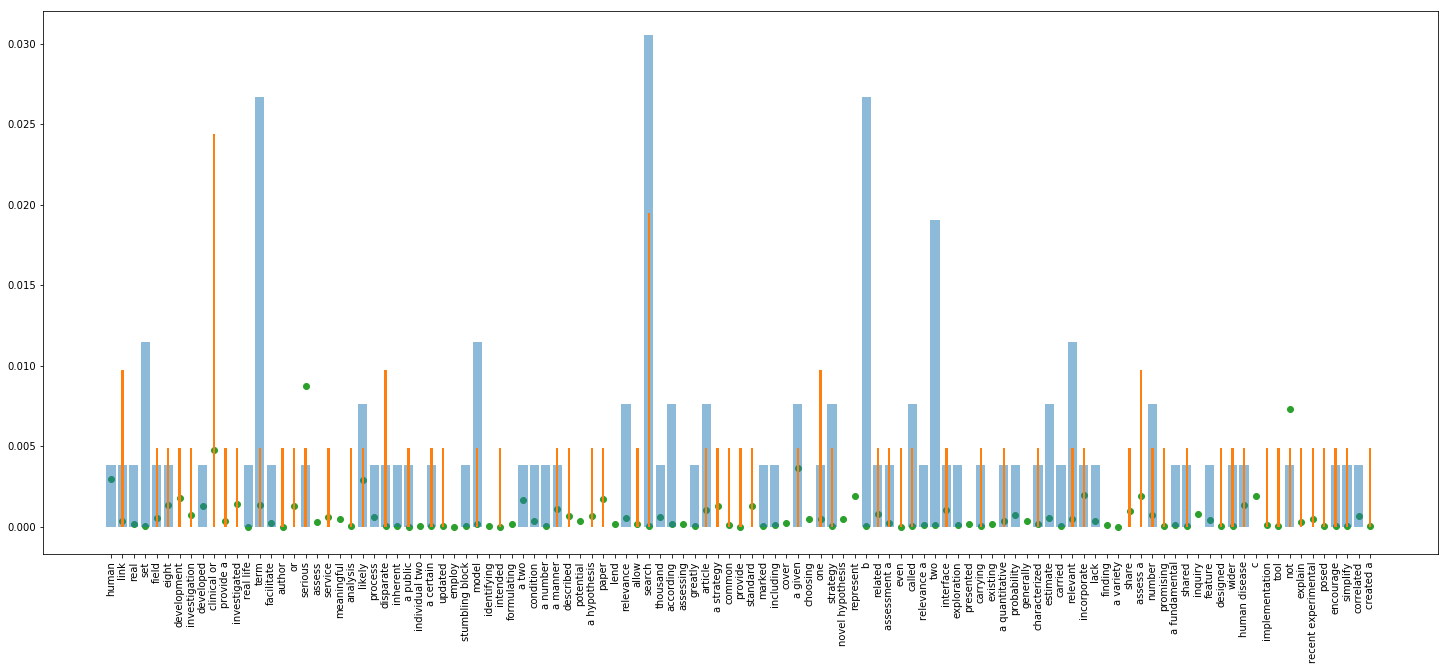

4.43728364841e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=25656516


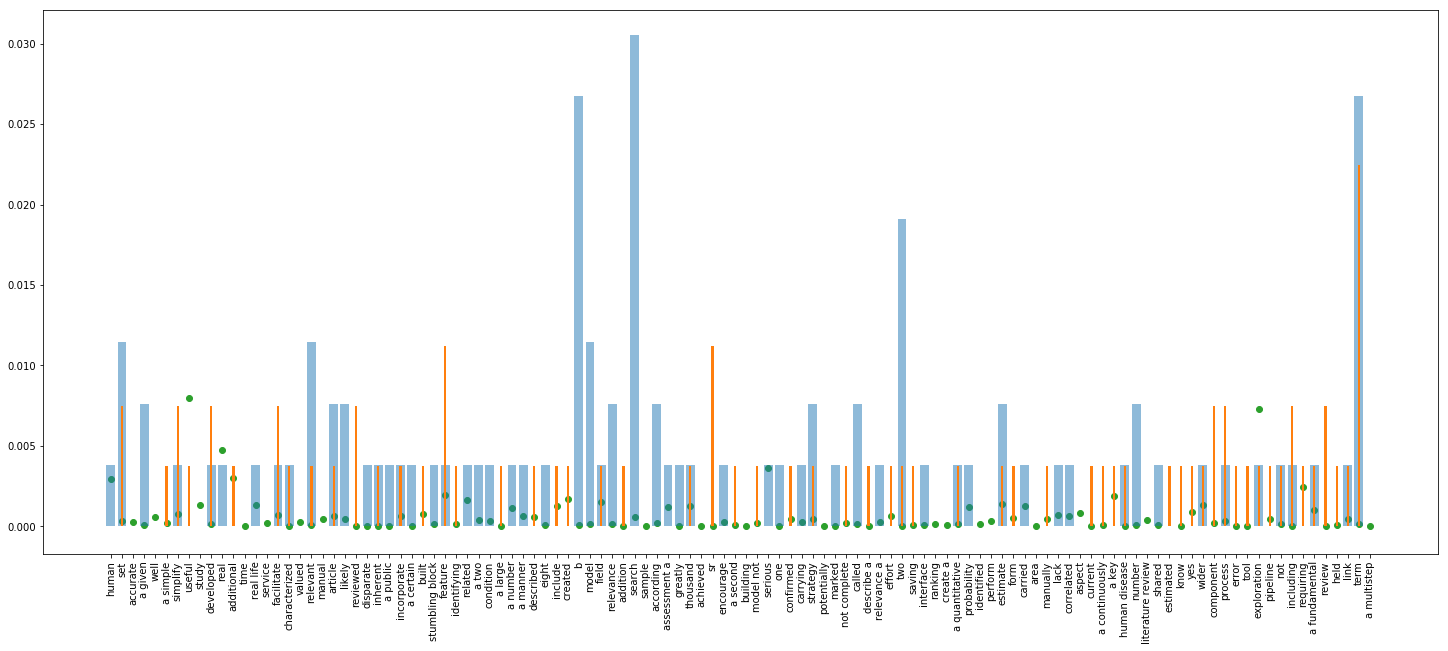

1.00407782844e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=16817965


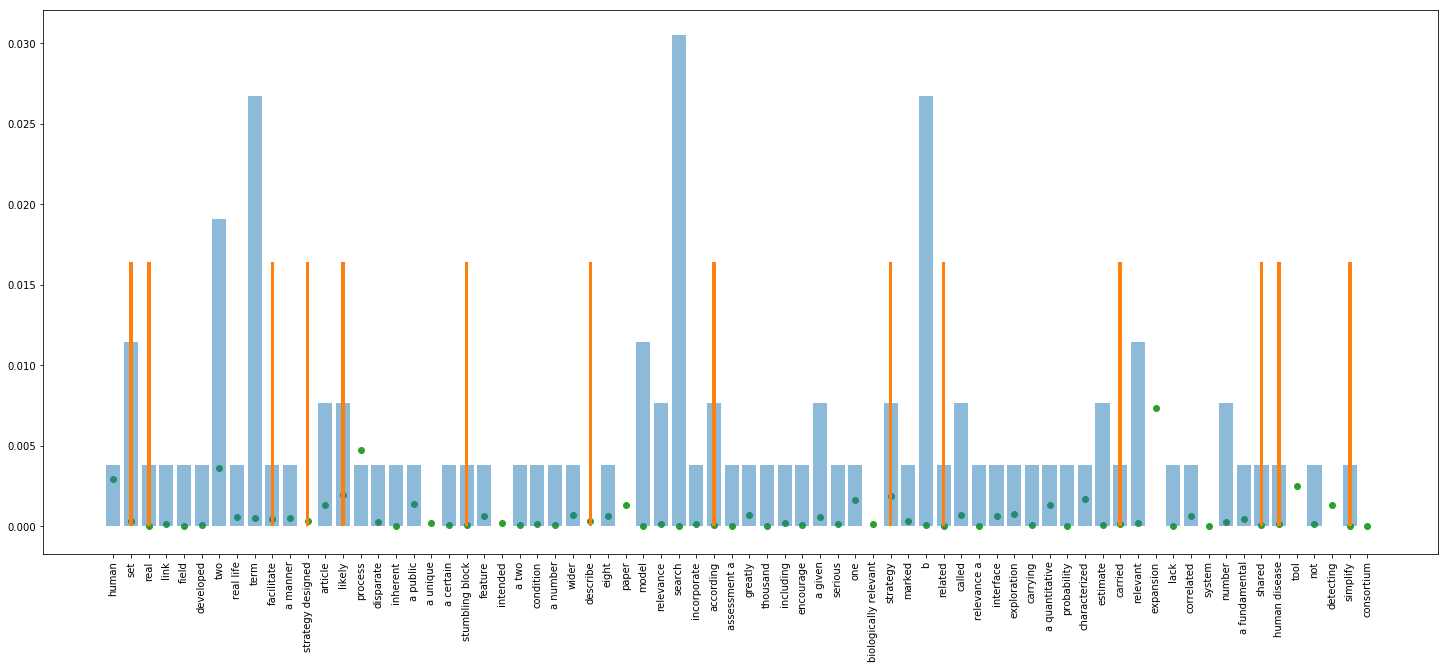

1.32011376473e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=27213780


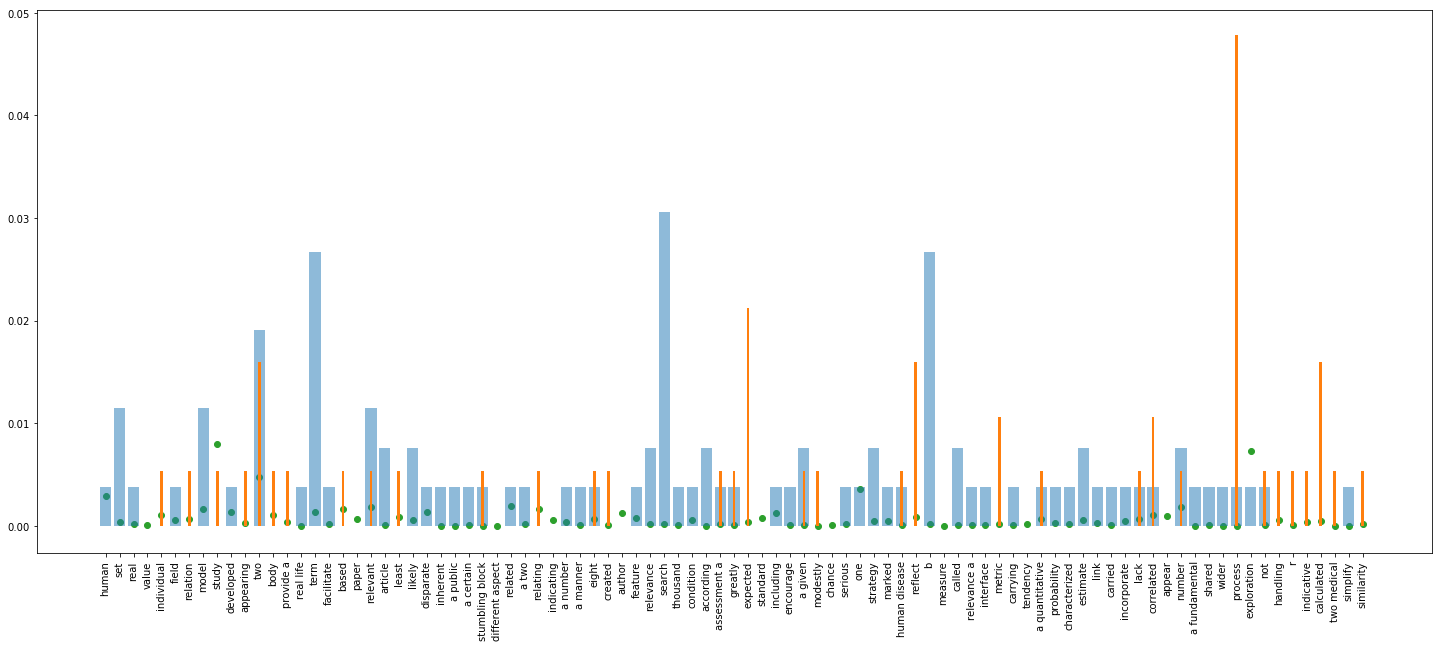

1.0439392271e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=20072710


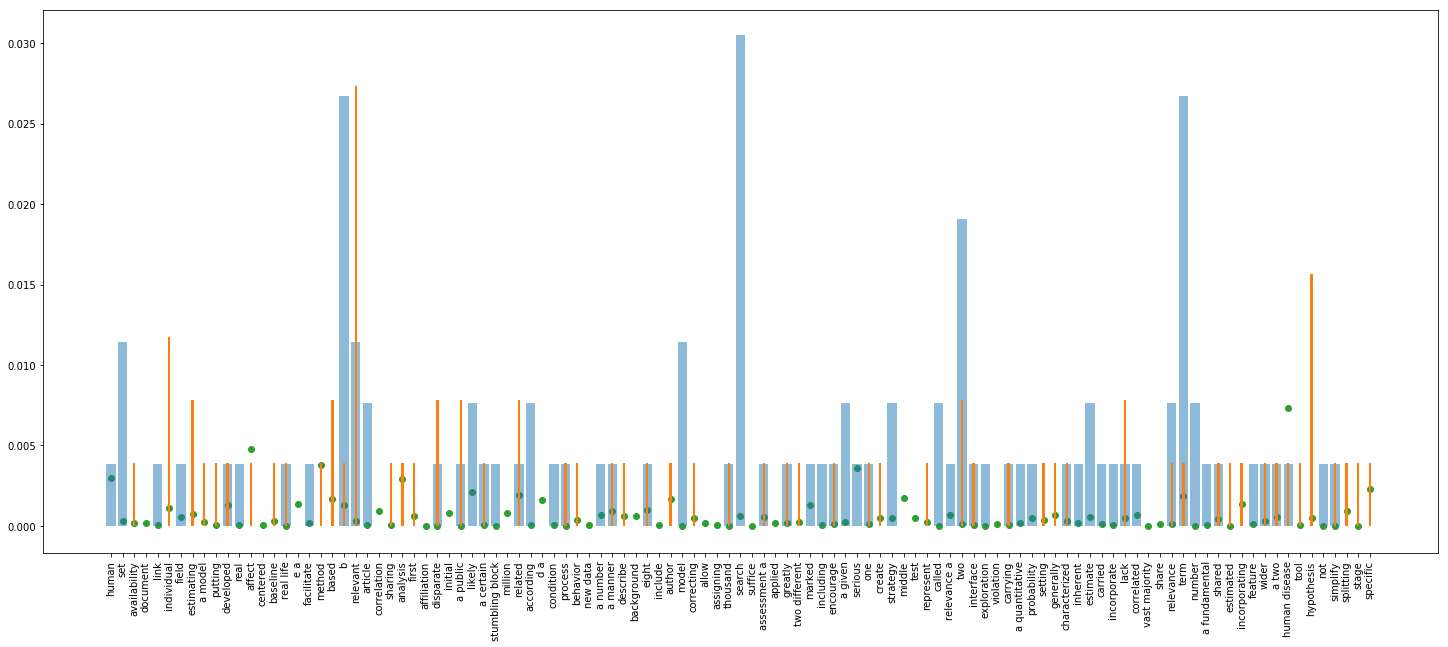

4.51291058369e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=9822851


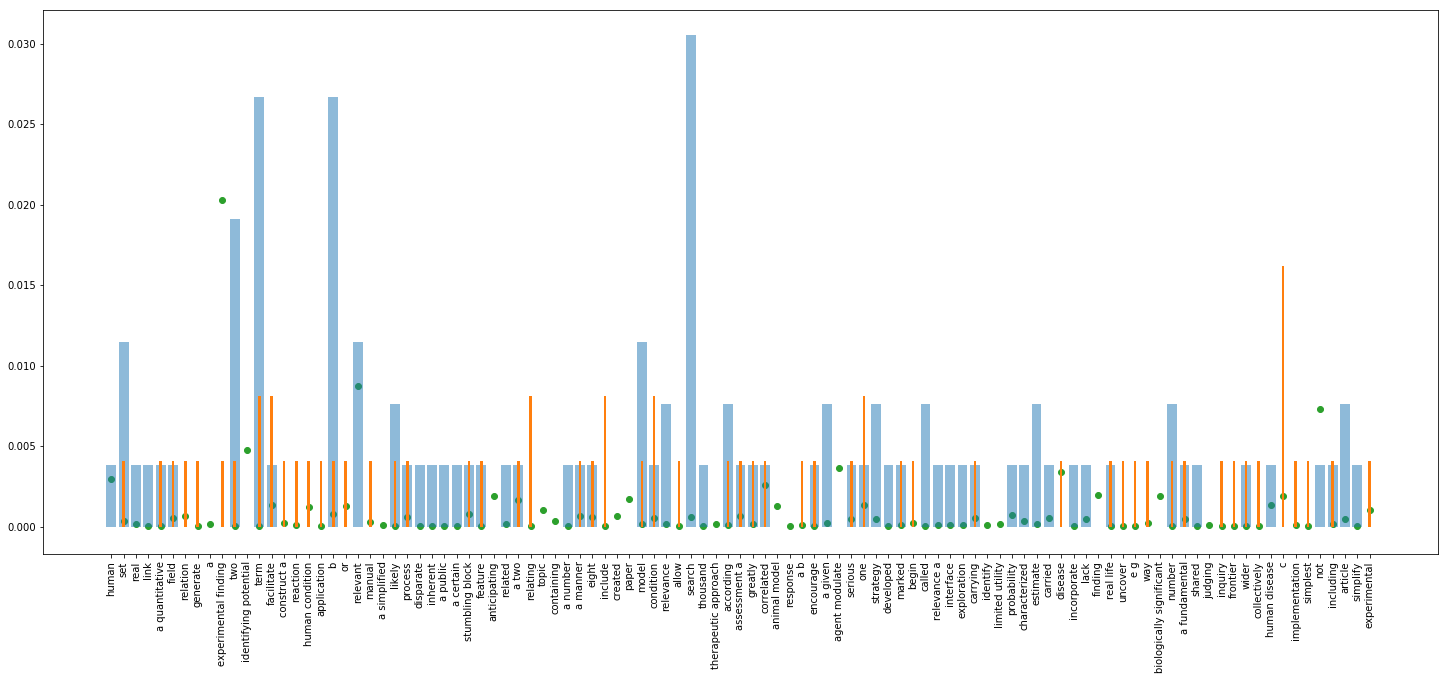

2.01967621275e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=16982707


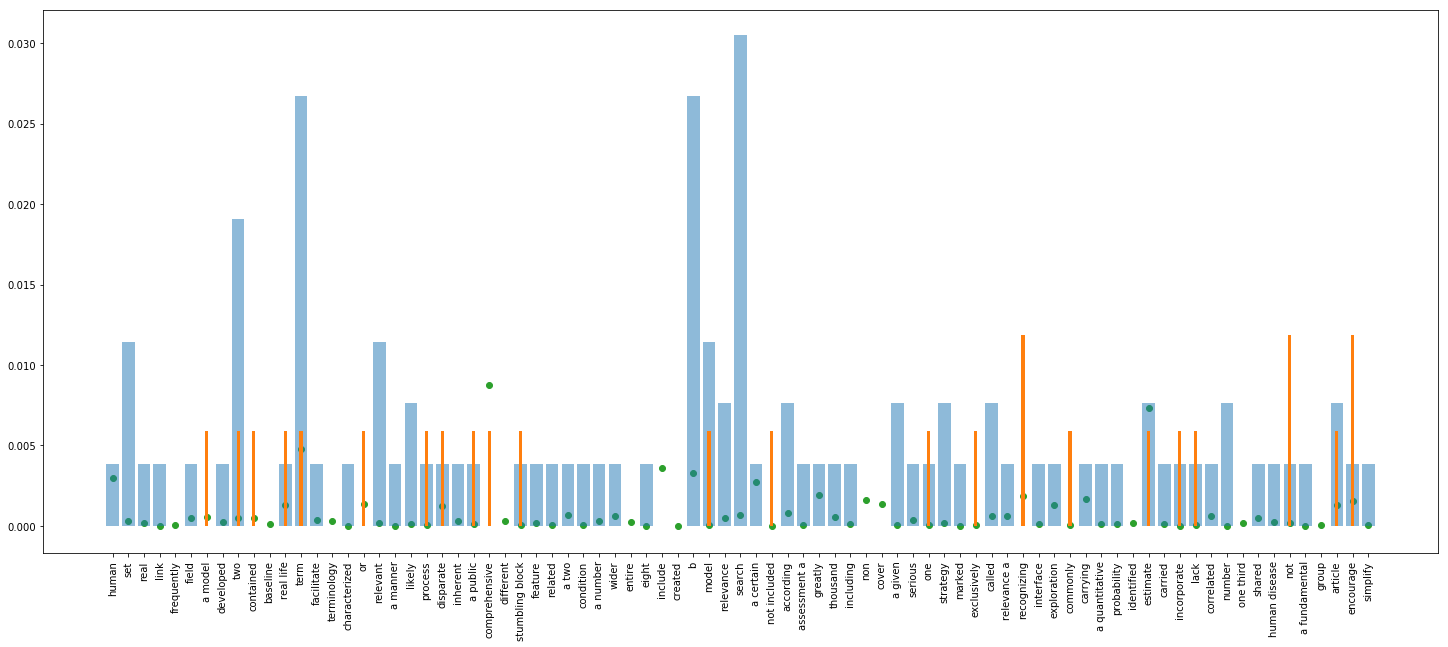

1.0274687302e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=12519986


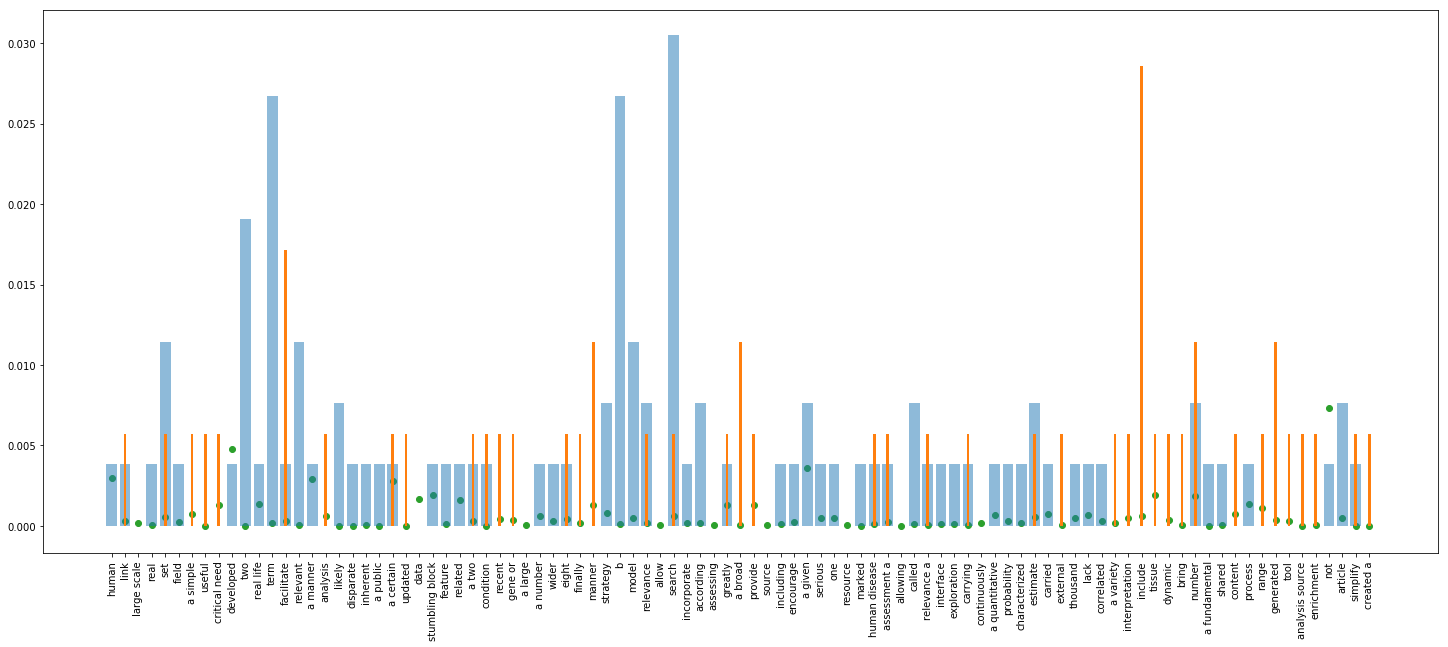

1.10004511794e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=22962463


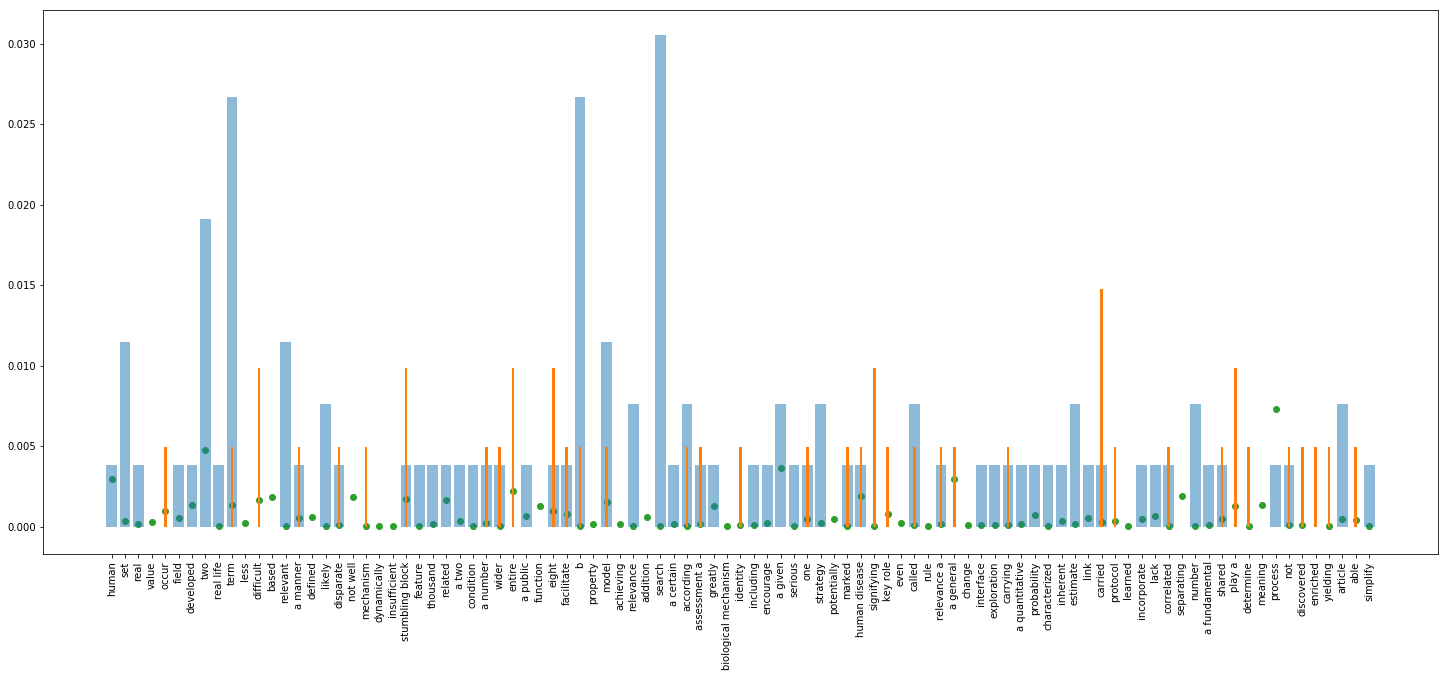

3.17811316727e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=9545441


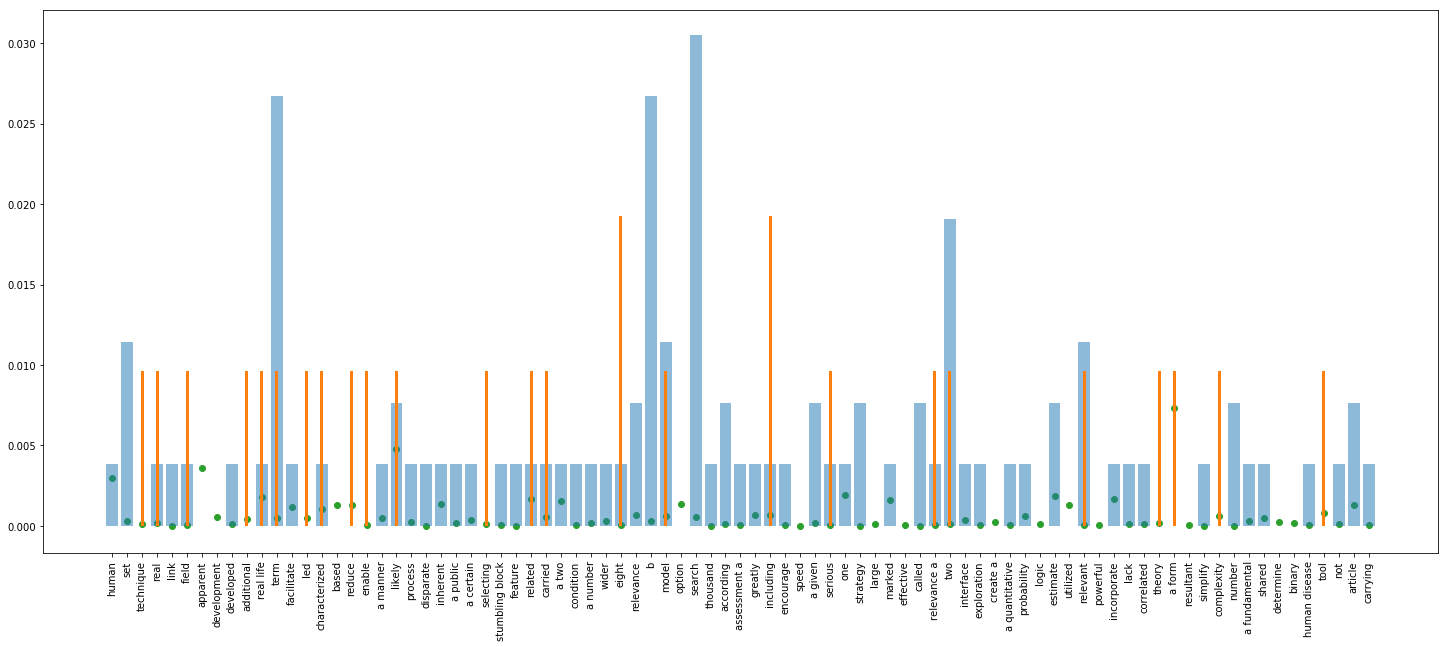

1.07428485353e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=15171980


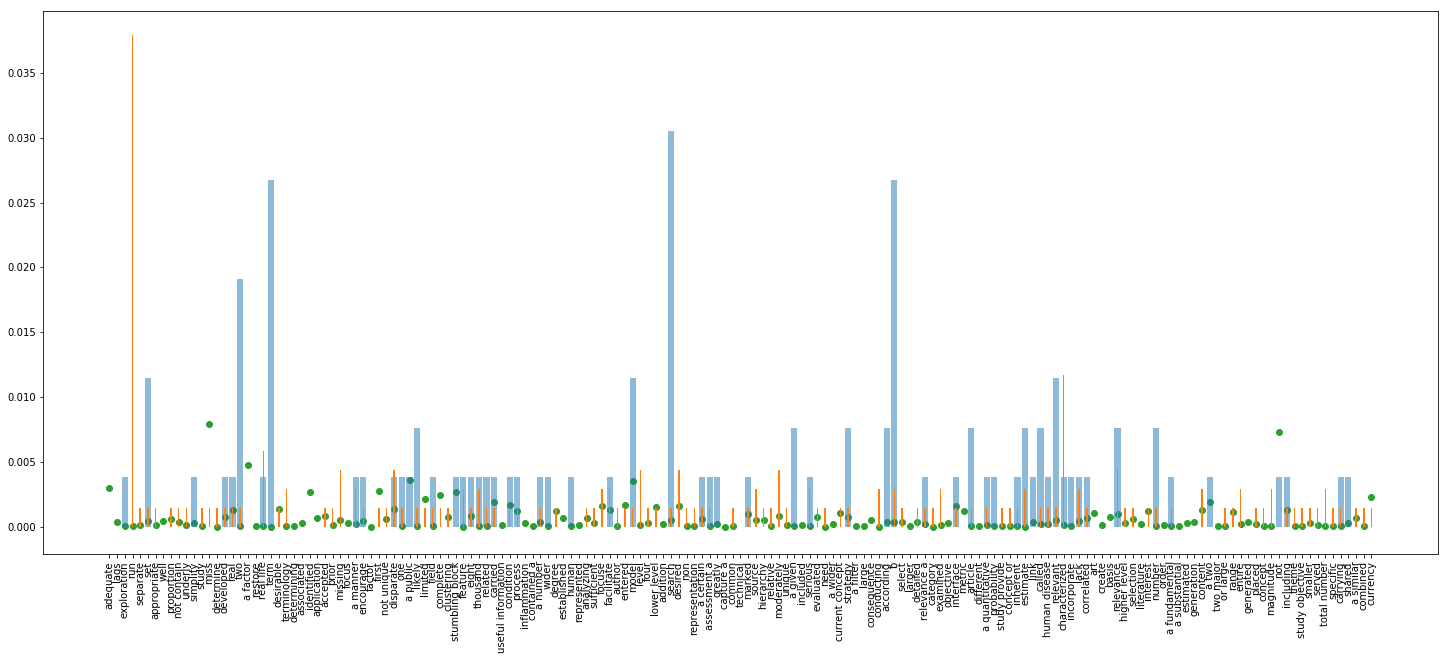

3.20051640199e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=19383159


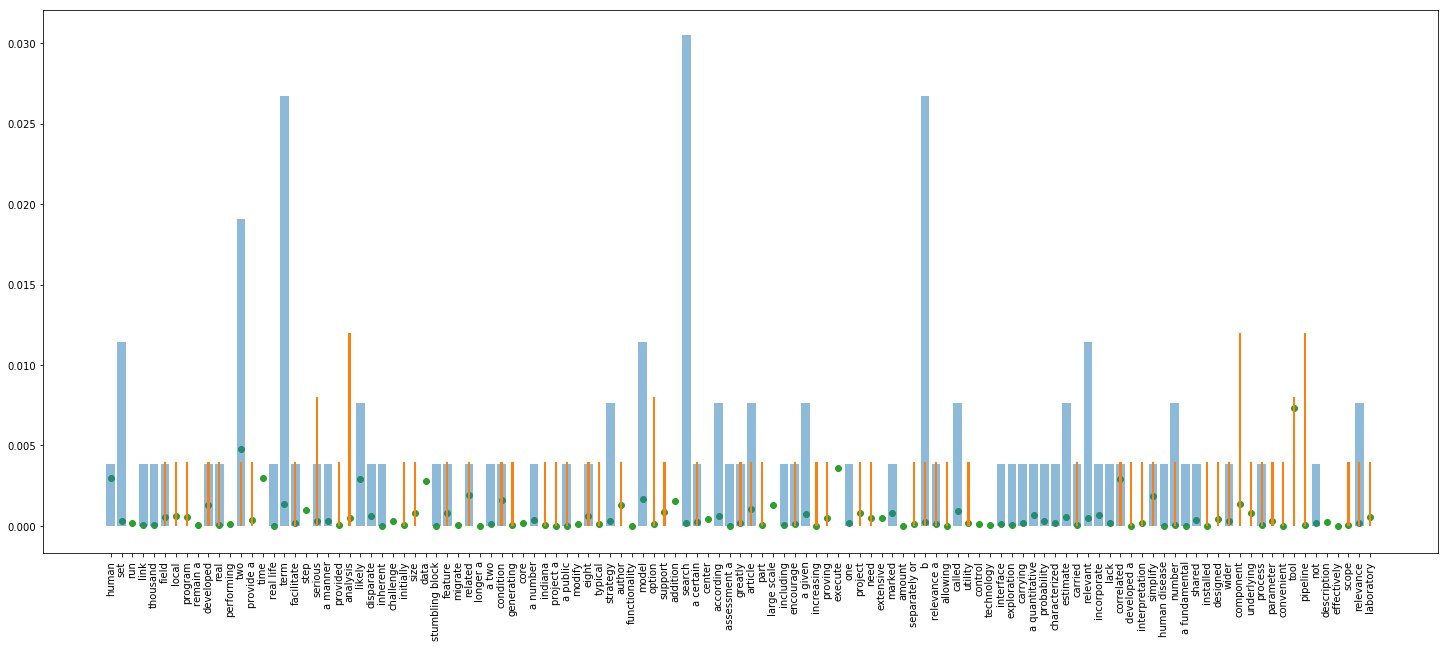

1.5562309724e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=21194573


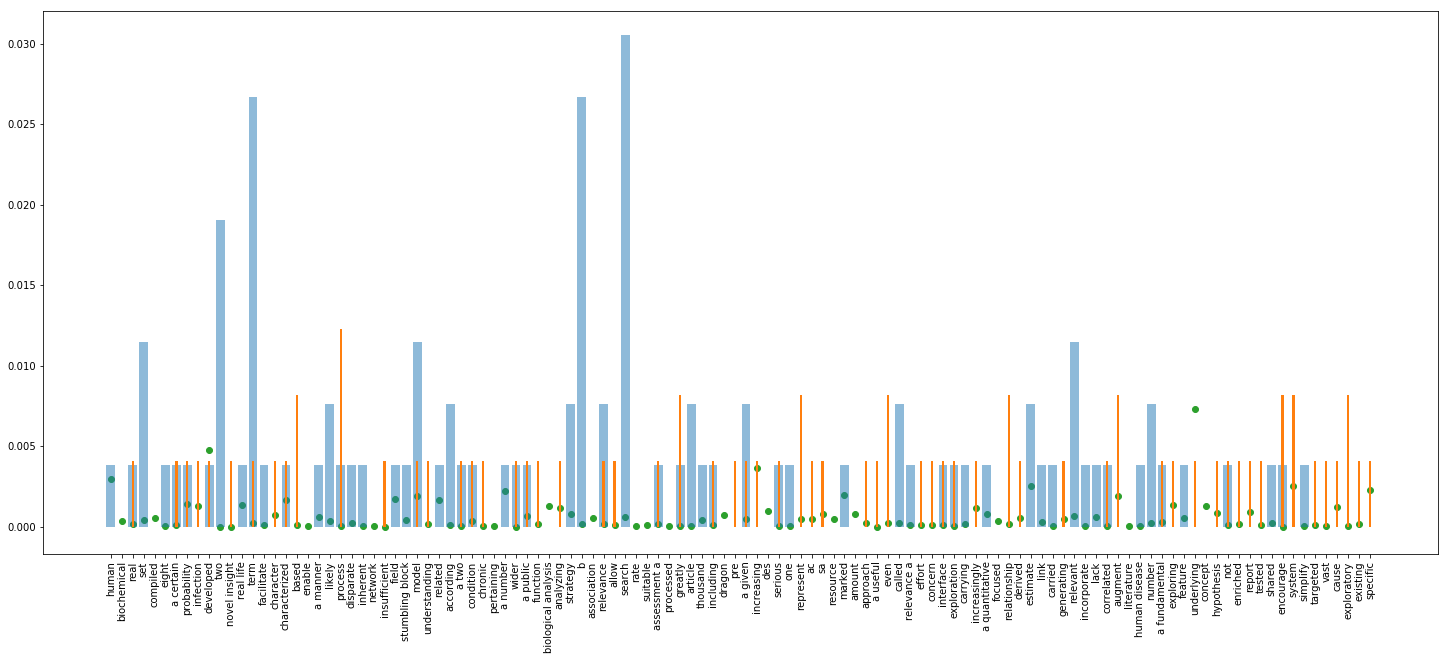

7.27078873854e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=27216254


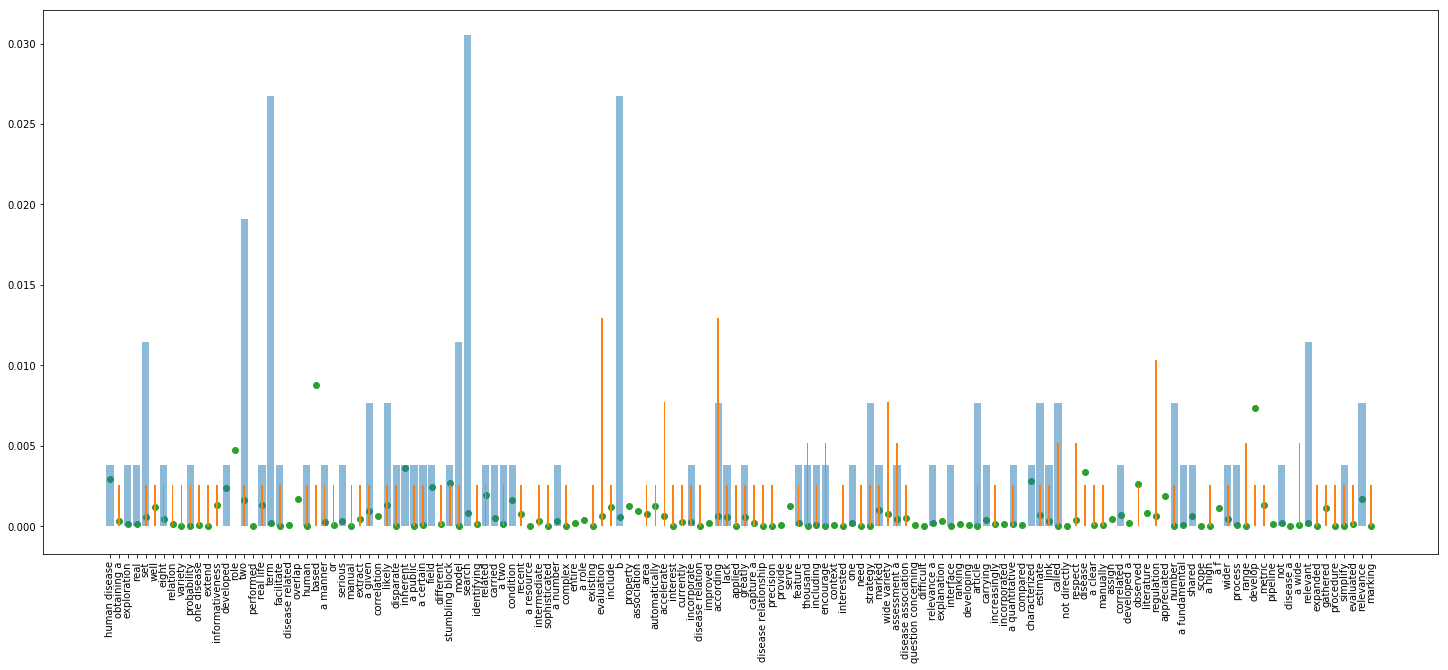

2.36629715456e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=24705205


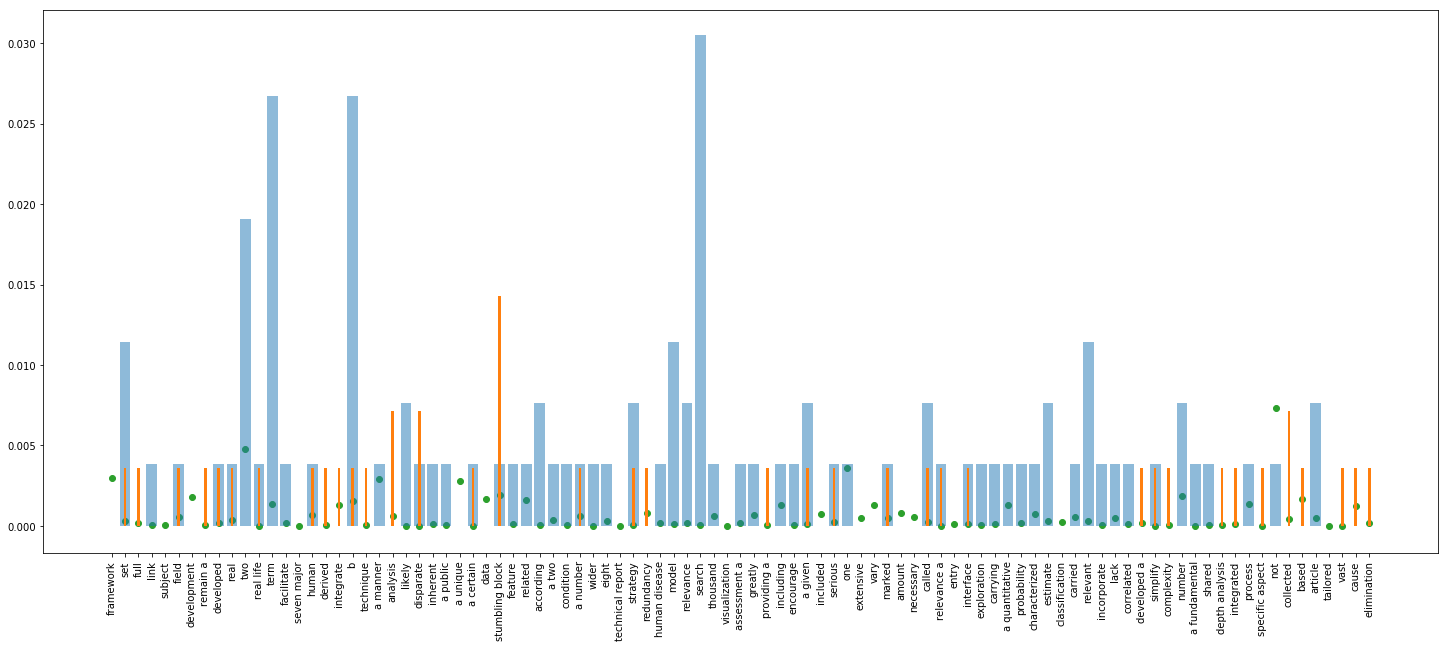

3.23809087346e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=20157492


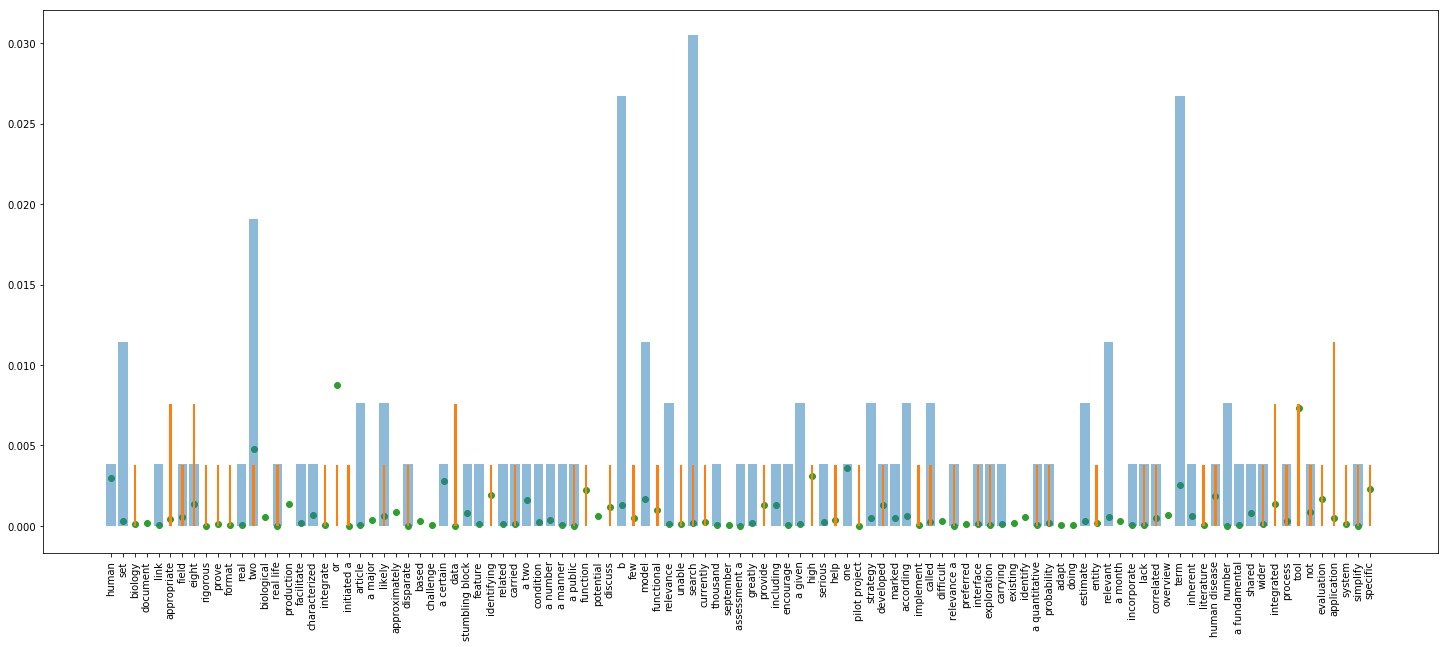

7.35944718993e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=27235801


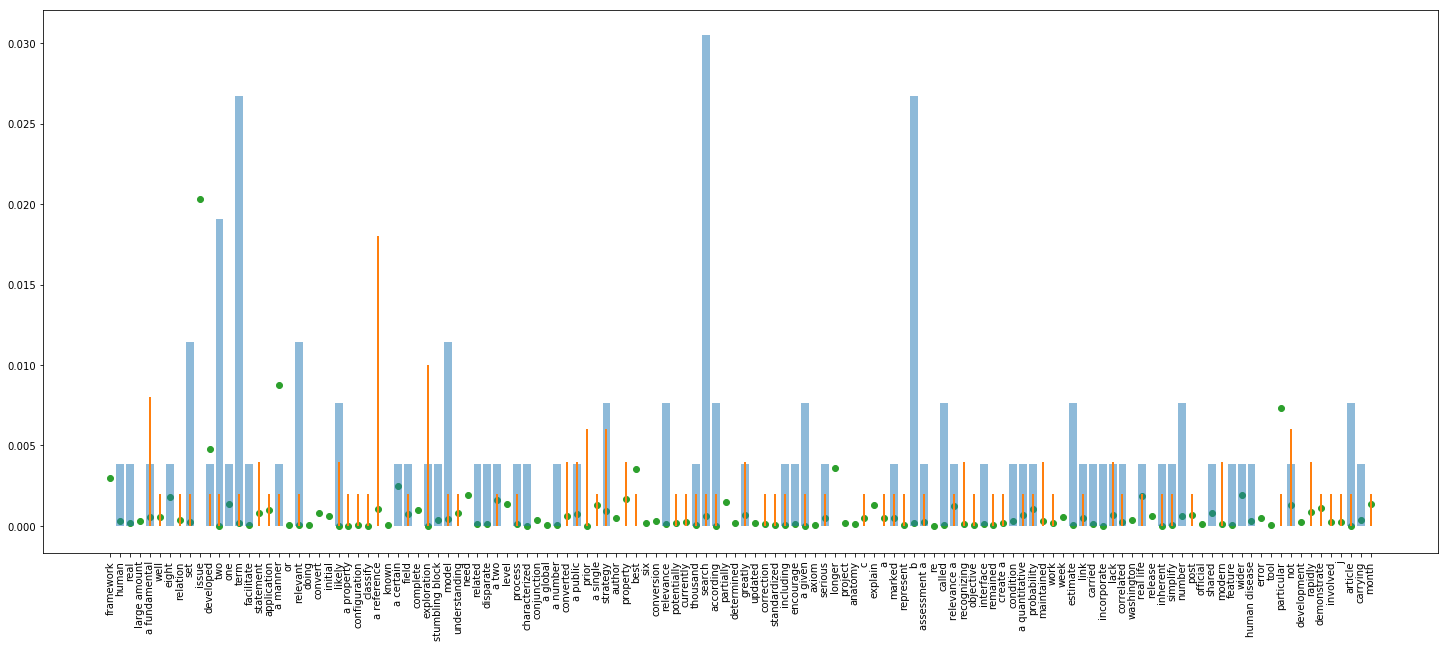

5.72367548954e-07
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=26768620


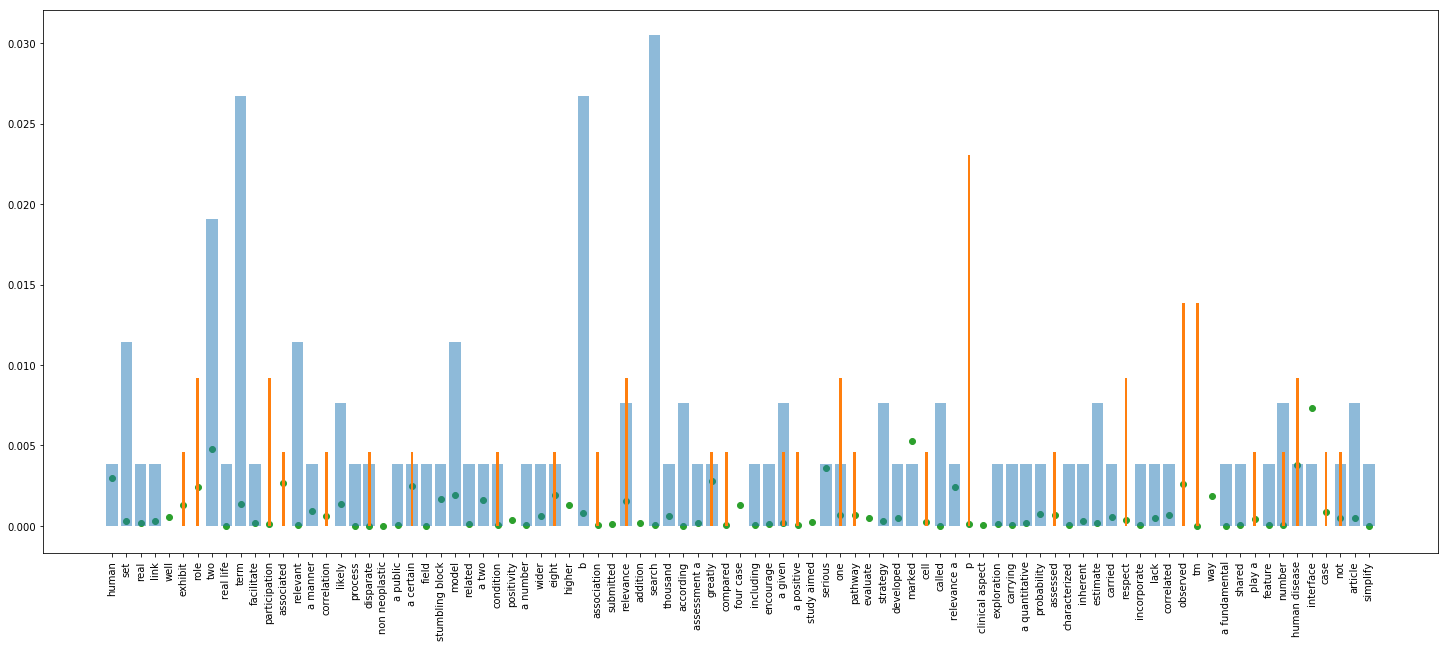

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=19433502


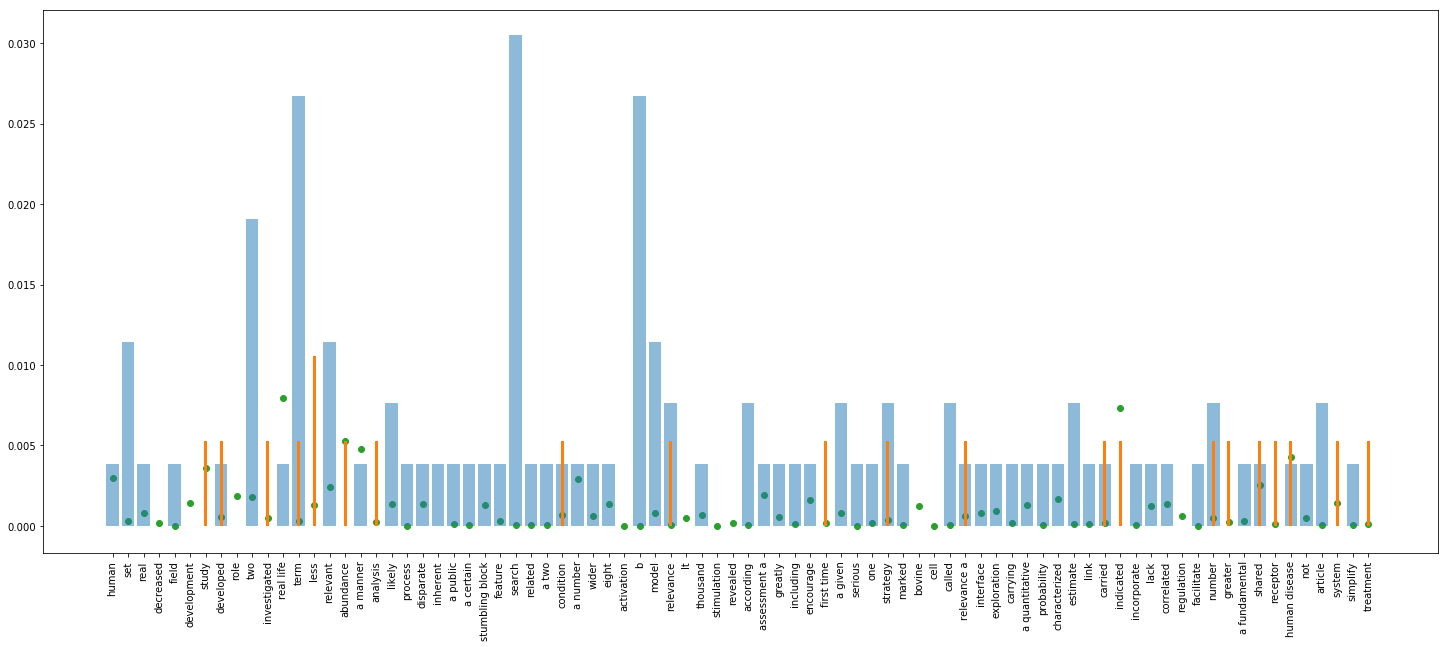

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=12917489


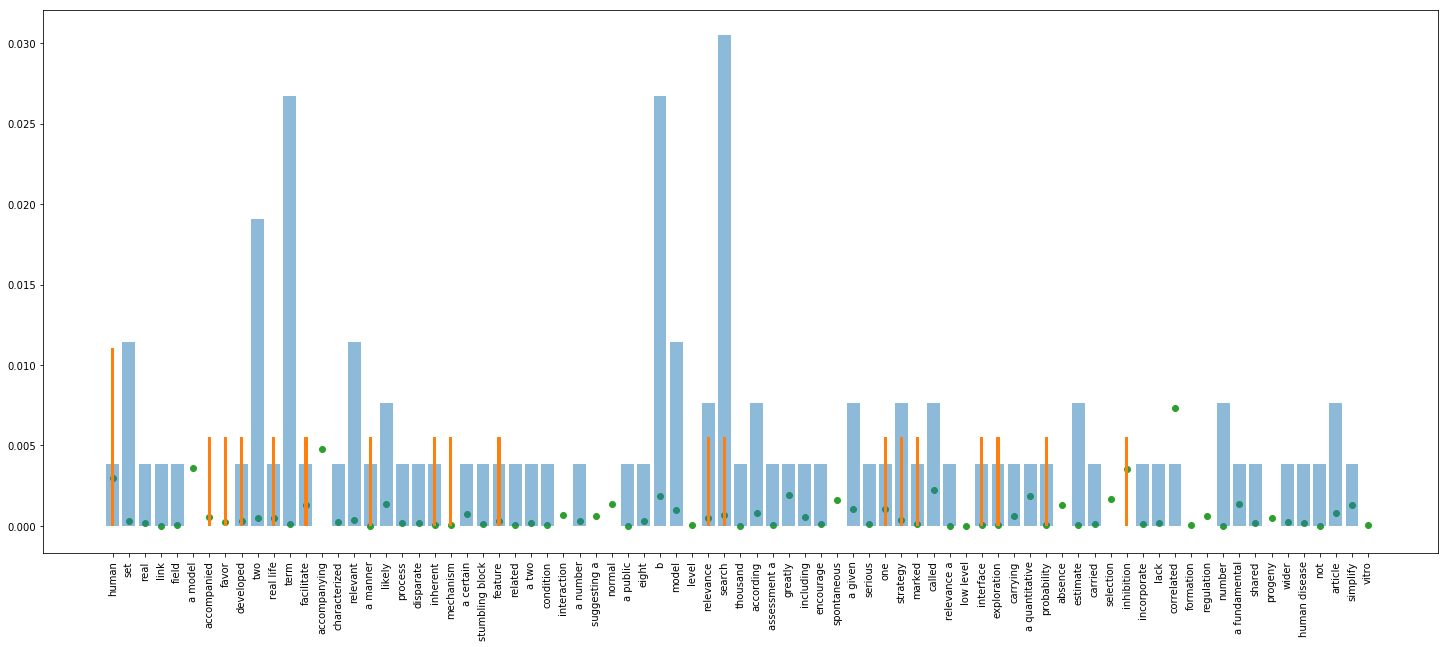

1.58939644146e-07
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=25307863


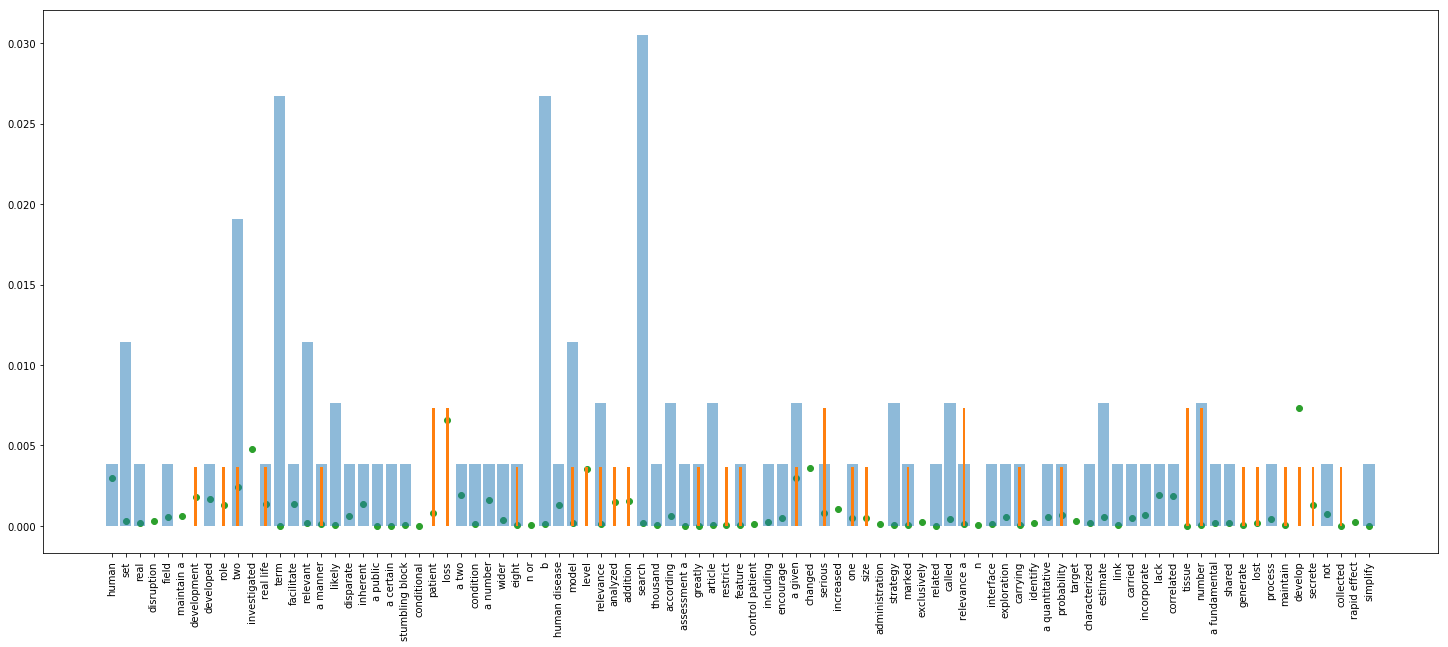

1.76404348437e-06


In [43]:
similarity_list = []
content_sim = [67, 60, 55, 46, 44, 42, 38, 27, 26, 25, 24, 24, 24, 24, 24, 24, 24, 5, 4, 3, 2]
content_sim = np.array(content_sim) / (max(content_sim) + 10)
author_sim = np.zeros(len(content_sim))
author_sim[:6] = 1
pmid_list = [19185946, 25656516, 16817965, 27213780, 20072710, 9822851, 16982707, \
            12519986, 22962463, 9545441, 15171980, 19383159, 21194573, 27216254, 24705205, 20157492, 27235801, \
            26768620, 19433502, 12917489, 25307863]
for ind, pmid in enumerate( pmid_list ):
    cohesion_dict, word_list, num_words = getListofLowCohessionWords(pmid, coh = 0.1)
    word_freq = dict(Counter( word_list ))
    #print(word_freq)
    word_freq = {k: v / num_words for k, v in word_freq.items()}
    
    parent = word_freq.copy()
    parent.update(word_freq_ref)
    current = word_freq_ref.copy()
    current.update(word_freq)
    ref = current.copy()
    ref={k: Reference_normalized.get(k) for k, v in ref.items()}
    
    #print(num_words)
    sim_score = 0
    for word, _ in word_freq_ref.items():
        if word in word_freq:
            coh_score = 0.1-cohesion_dict[word]
            sim_score = sim_score + (word_freq[word]-Reference_normalized[word])*(word_freq_ref[word]-Reference_normalized[word])*coh_score
            #print(word, " = ", word_freq[word]-Reference_normalized[word], " = ", word_freq_ref[word]-Reference_normalized[word], " = ", coh_score)
        else:
            current[word] = 0
    
    for word, _ in word_freq.items():
        if word not in word_freq_ref:
            parent[word] = 0
    
    #x_par, y_par = zip(*parent)
    #x_cur, y_cur = zip(*current)
    plt.bar(range(len(list(parent.keys()))), list(parent.values()), alpha = 0.5)
    plt.bar(range(len(list(current.keys()))), list(current.values()), width=0.2)
    plt.scatter(range(len(list(ref.keys()))), list(ref.values()))
    plt.xticks(range(len(list(current.keys()))), list(parent.keys()), rotation = 90)
    plt.show()
    print(sim_score)
    similarity_list.append(sim_score)
    
similarity_list = np.array(similarity_list) / (max(similarity_list))     

In [158]:
pd.DataFrame(data={"Similarity Score":similarity_list, "Content Score": content_sim, "Same Author": author_sim}, index=pmid_list)
#print(similarity_list)
#print(content_sim)

,Content Score,Same Author,Similarity Score
19185946,0.870130,1.0,1.000000
25656516,0.779221,1.0,0.226282
16817965,0.714286,1.0,0.297505
27213780,0.597403,1.0,0.235265
20072710,0.571429,1.0,0.101704
9822851,0.545455,1.0,0.455160
16982707,0.493506,0.0,0.023155
12519986,0.350649,0.0,0.247910
22962463,0.337662,0.0,0.071623
9545441,0.324675,0.0,0.242104


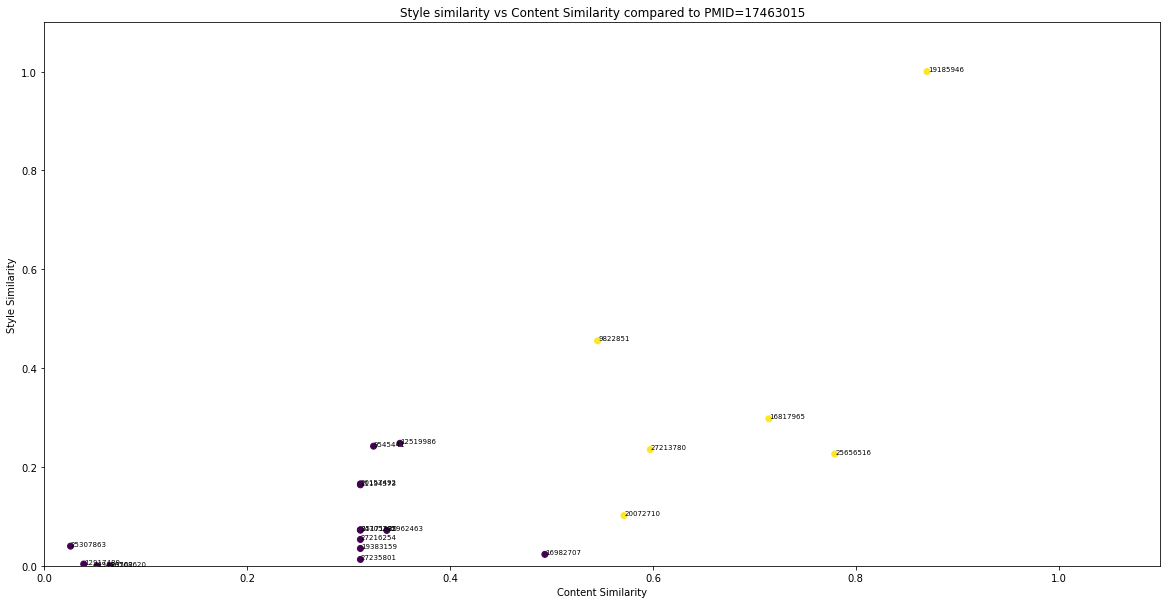

In [157]:
import random
fig, ax = plt.subplots()
a = ax.scatter(x=content_sim, y=similarity_list, c=author_sim)
count = 0
for p,i,j in zip(pmid_list, content_sim,similarity_list):
    if (count%2)==0:
        xt=i+5
        yt=j+5
    else:
        xt=i-5
        yt=j-5
    count=count+1
    ax.annotate('%s' %p, xy=(i,j), xytext=(i,j), textcoords='offset points', size = 7)
                #arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

plt.ylim((0, 1.1))
plt.xlim((0, 1.1))
plt.xlabel("Content Similarity")
plt.ylabel("Style Similarity")
plt.title("Style similarity vs Content Similarity compared to PMID=17463015")
plt.show()



# 2nd Example - 16914224

In [6]:
cohesion_dict_ref, word_list, num_words = getListofLowCohessionWords(16914224, coh = 0.1)
word_freq_ref = dict(Counter( word_list ))
word_freq_ref = {k: v / num_words for k, v in word_freq_ref.items()}
num_words

http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=16914224


68

http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=15922829


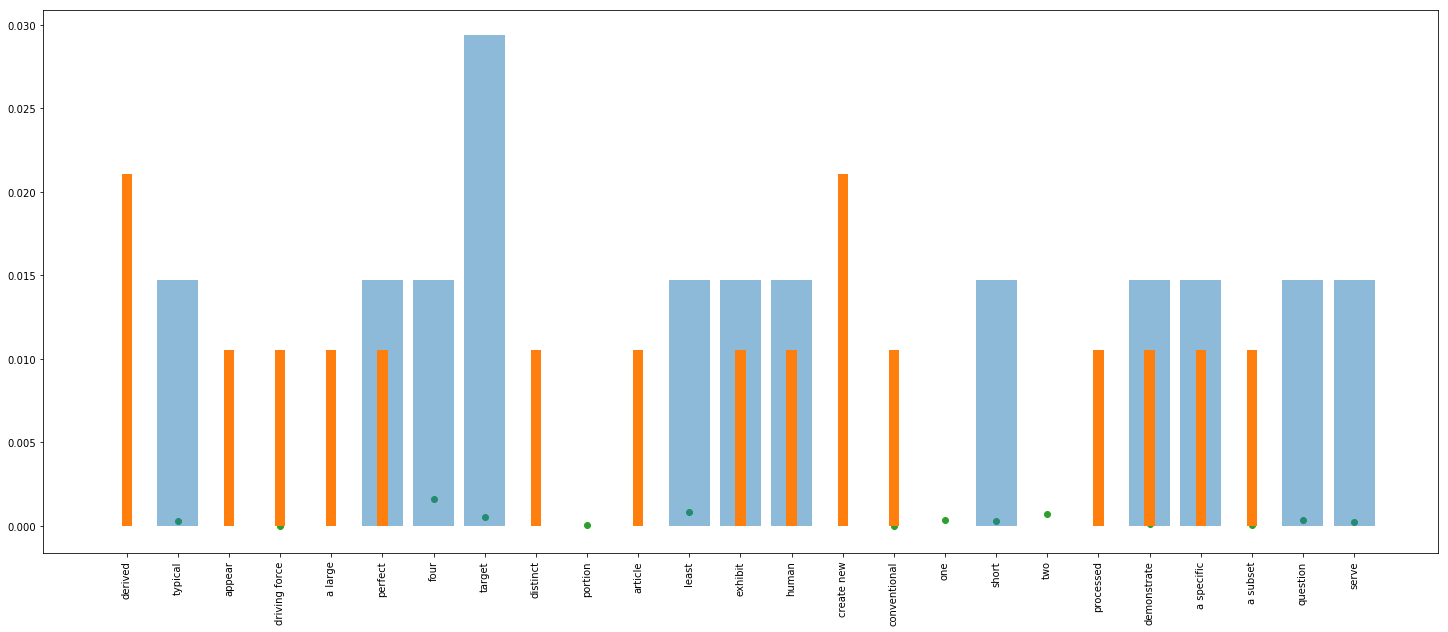

1.1497572782e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=24234653


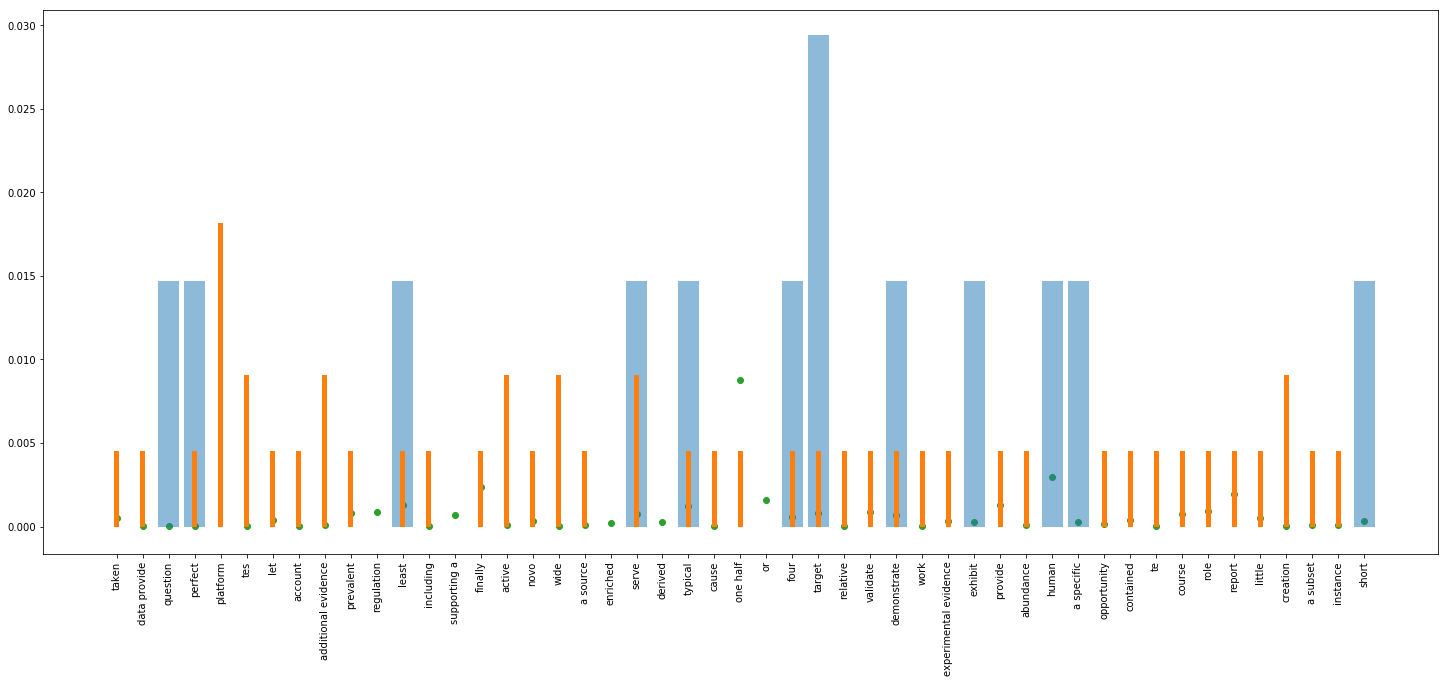

4.43639155213e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=19209240


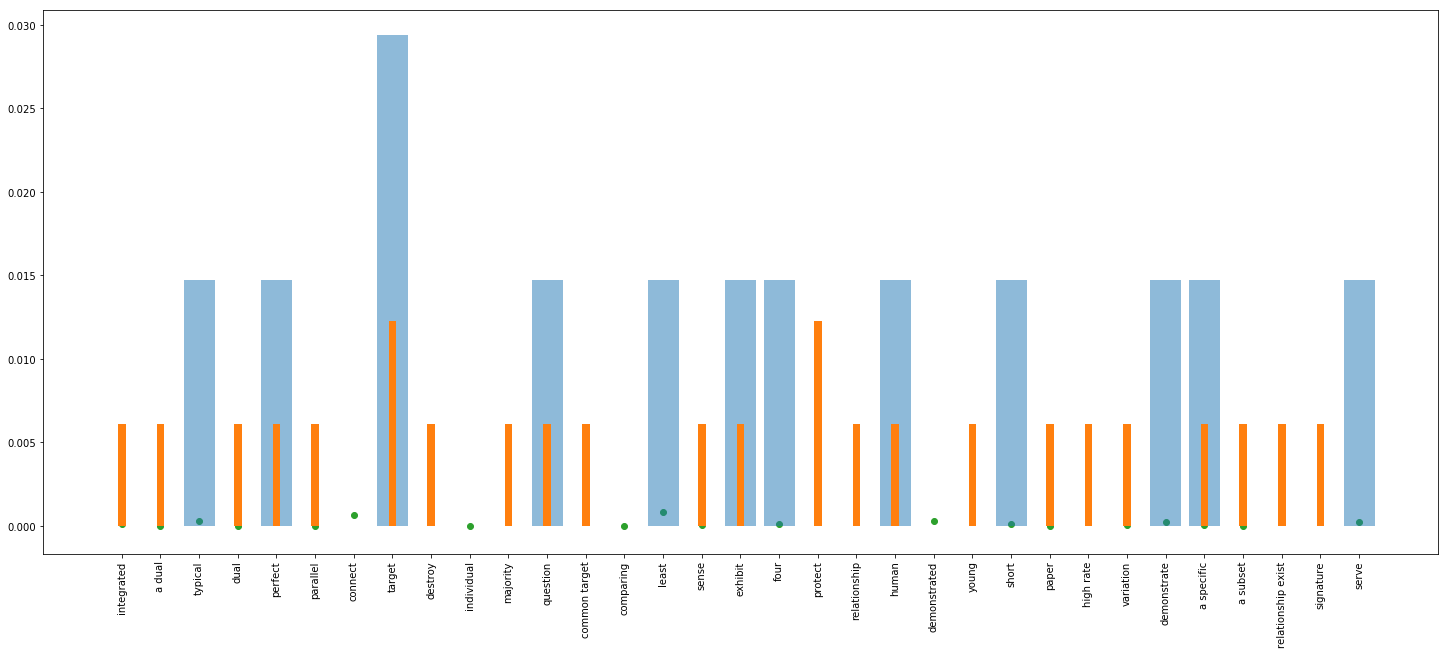

7.9480918894e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=23142080


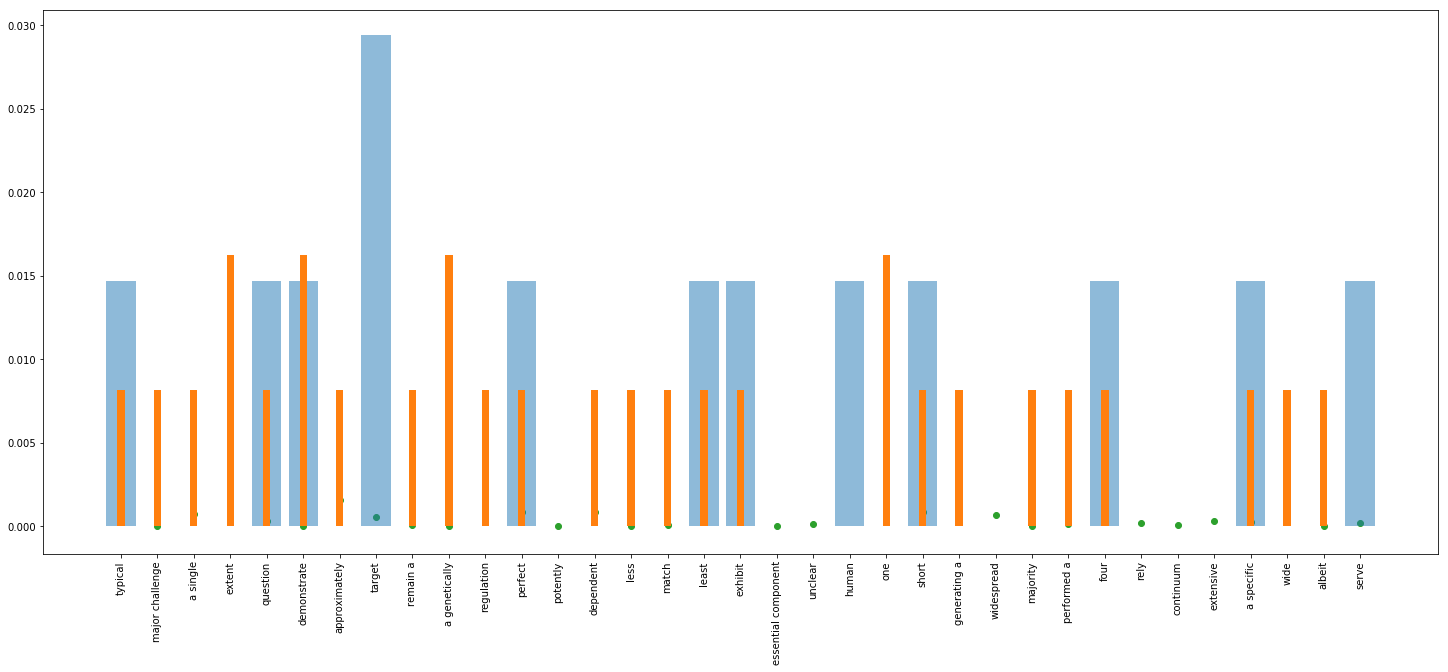

2.36564729722e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=22319171


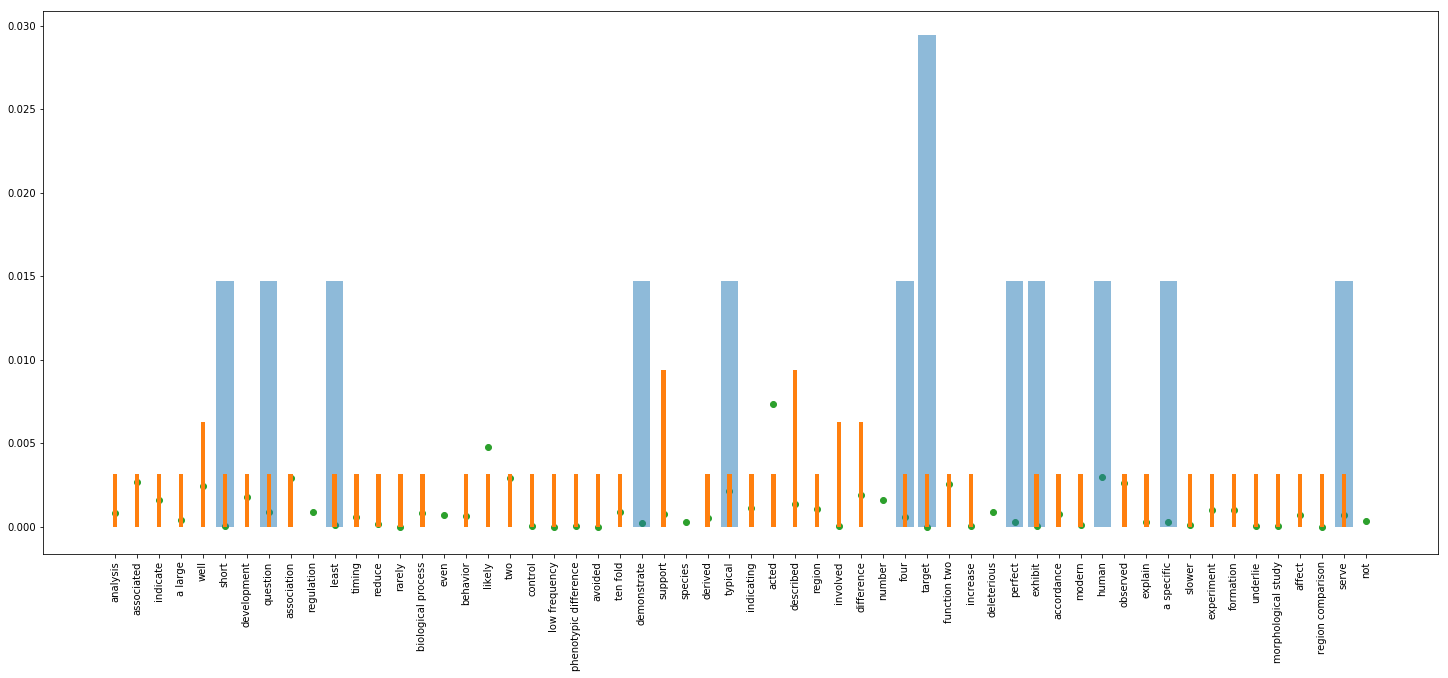

4.26975866474e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=20420713


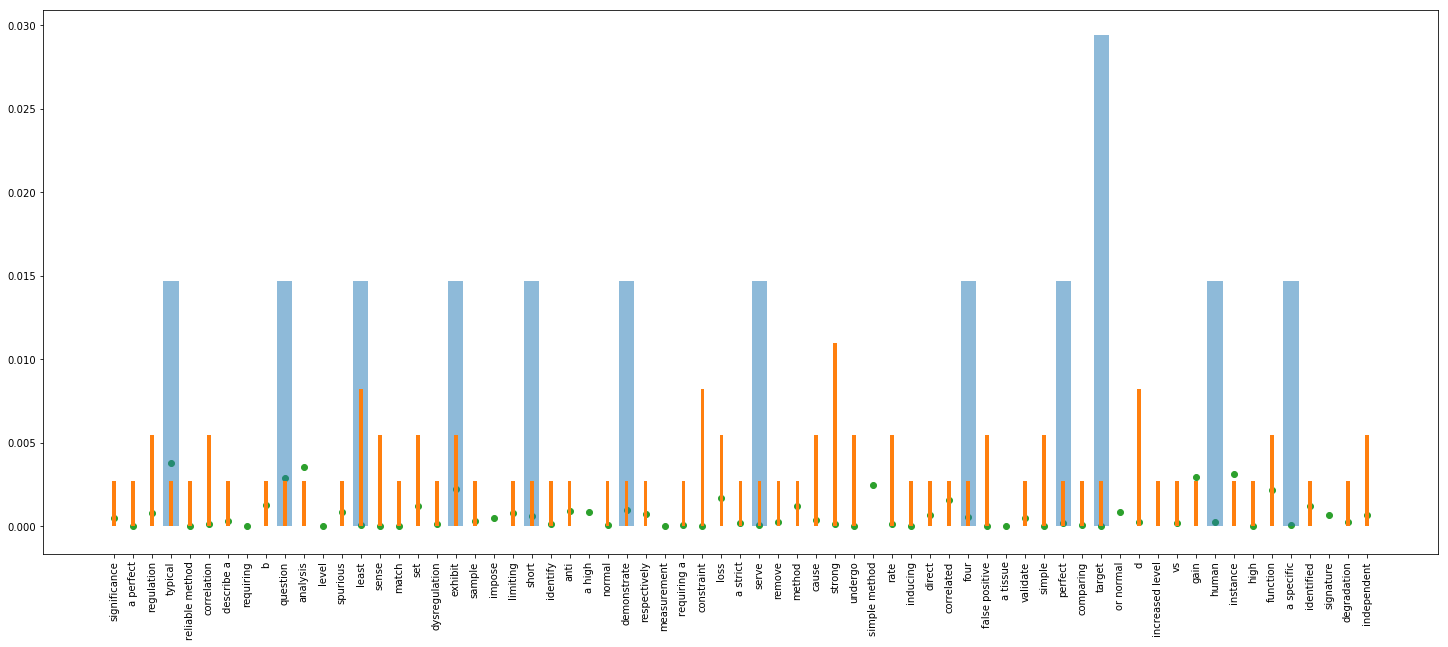

4.65838553164e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=23024754


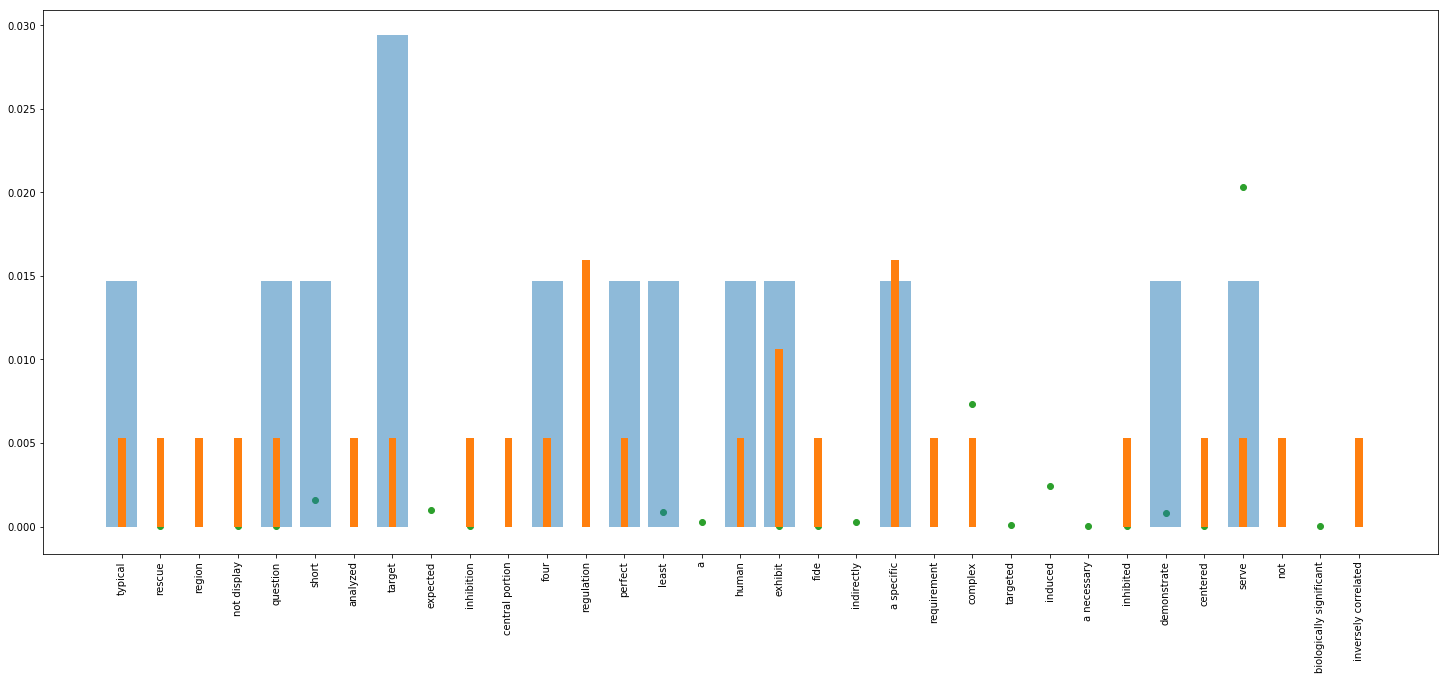

1.39469657204e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=21683170


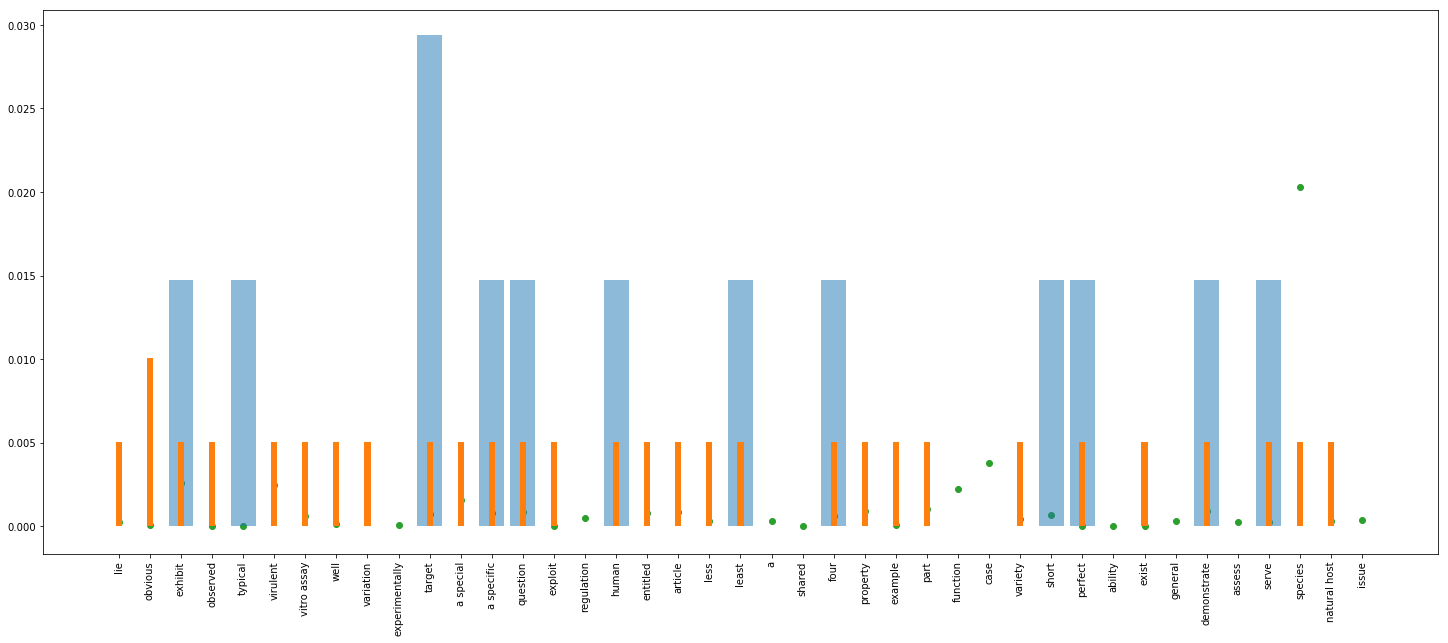

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=26151747


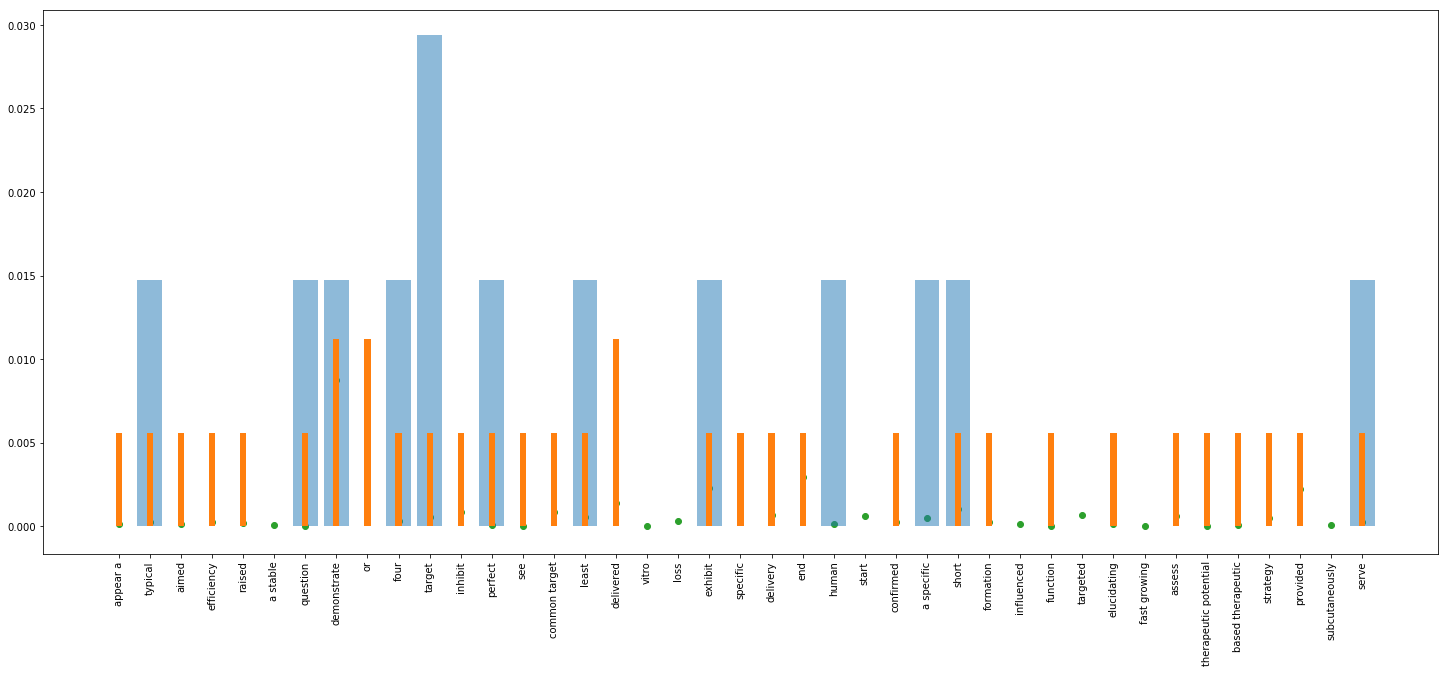

8.04704683456e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=23087843


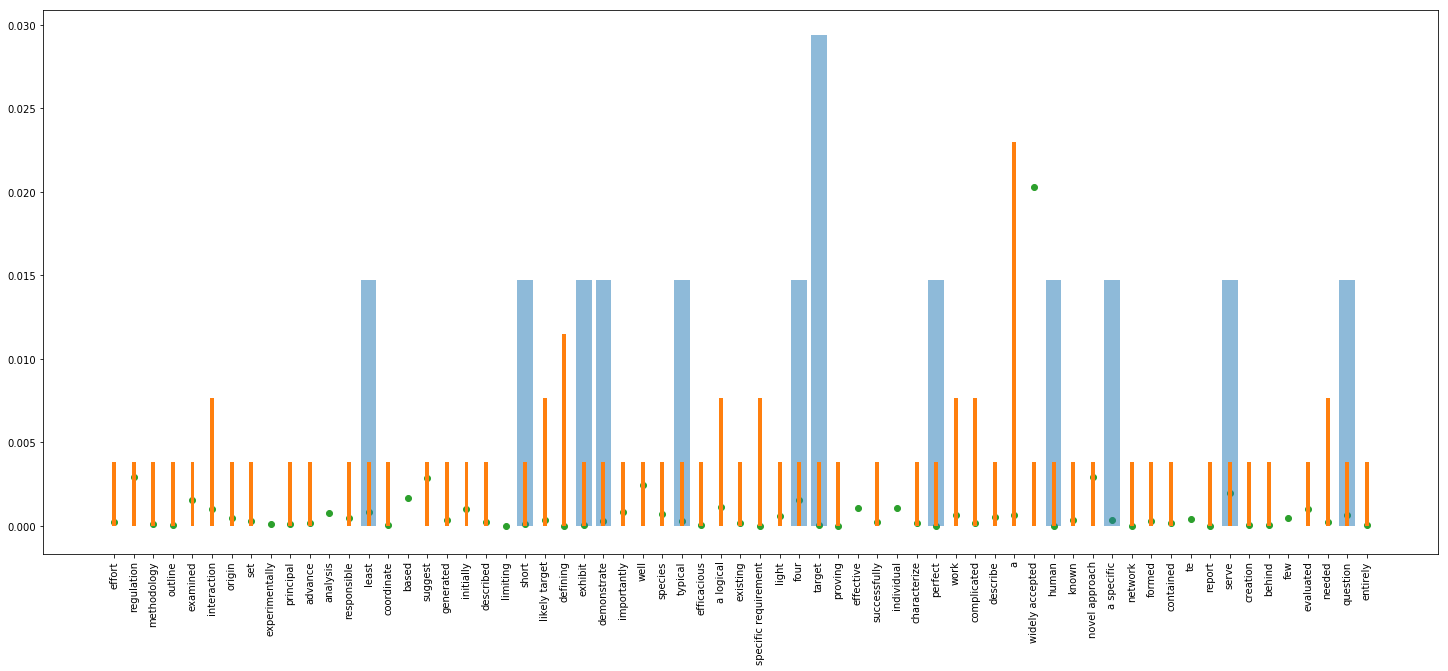

1.63781466898e-05
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=20501654


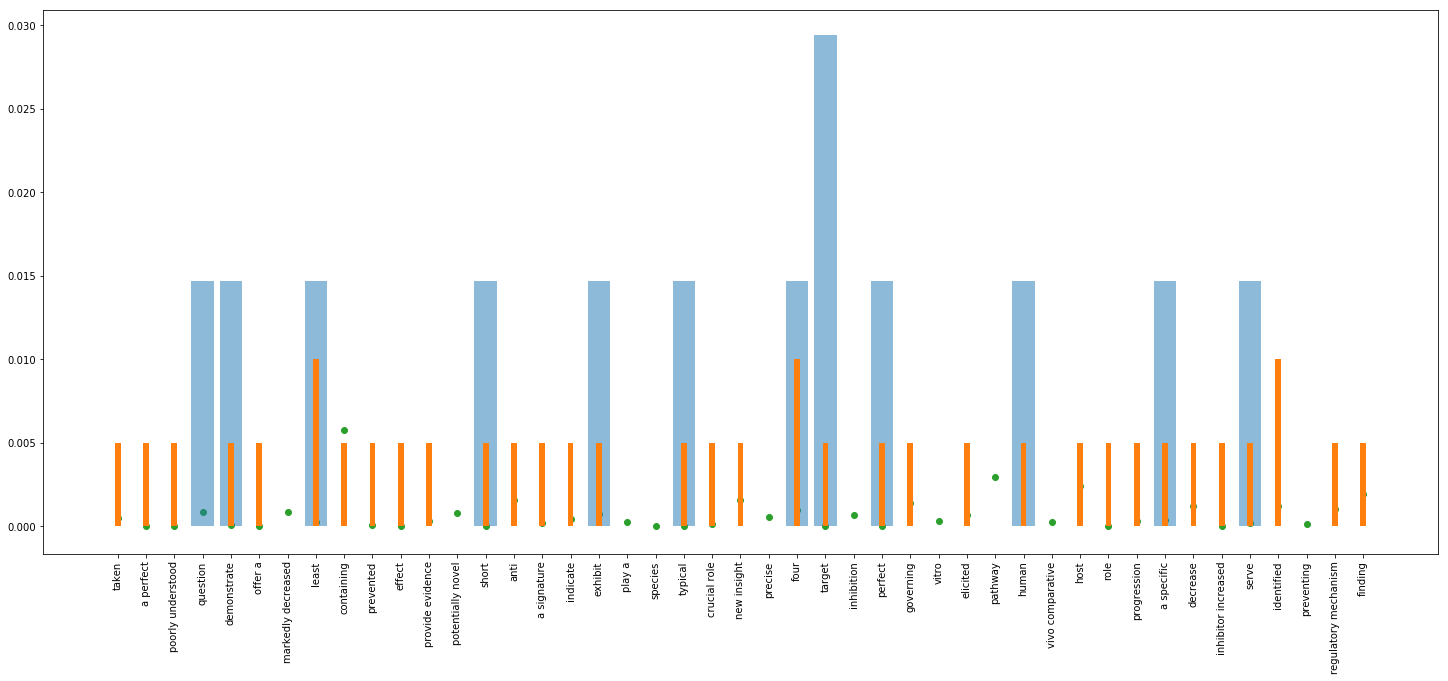

5.72454417368e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=26800695


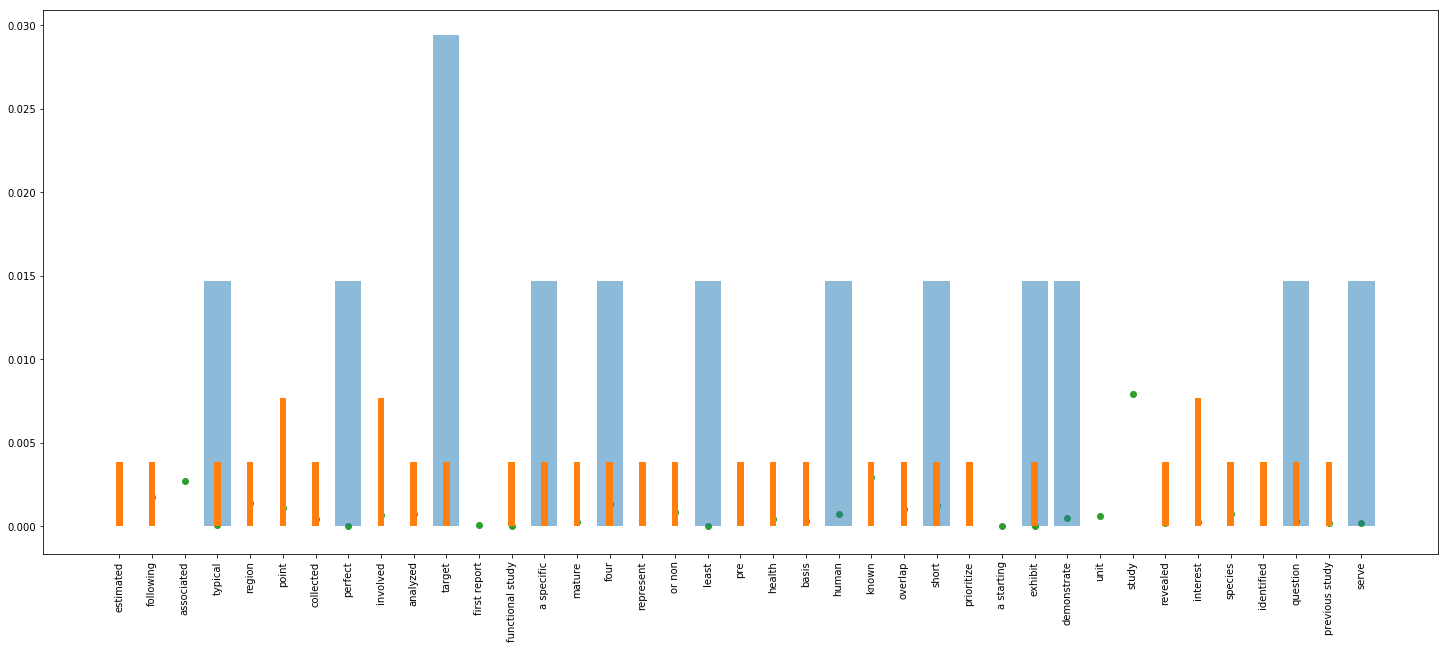

4.66599777956e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=21645299


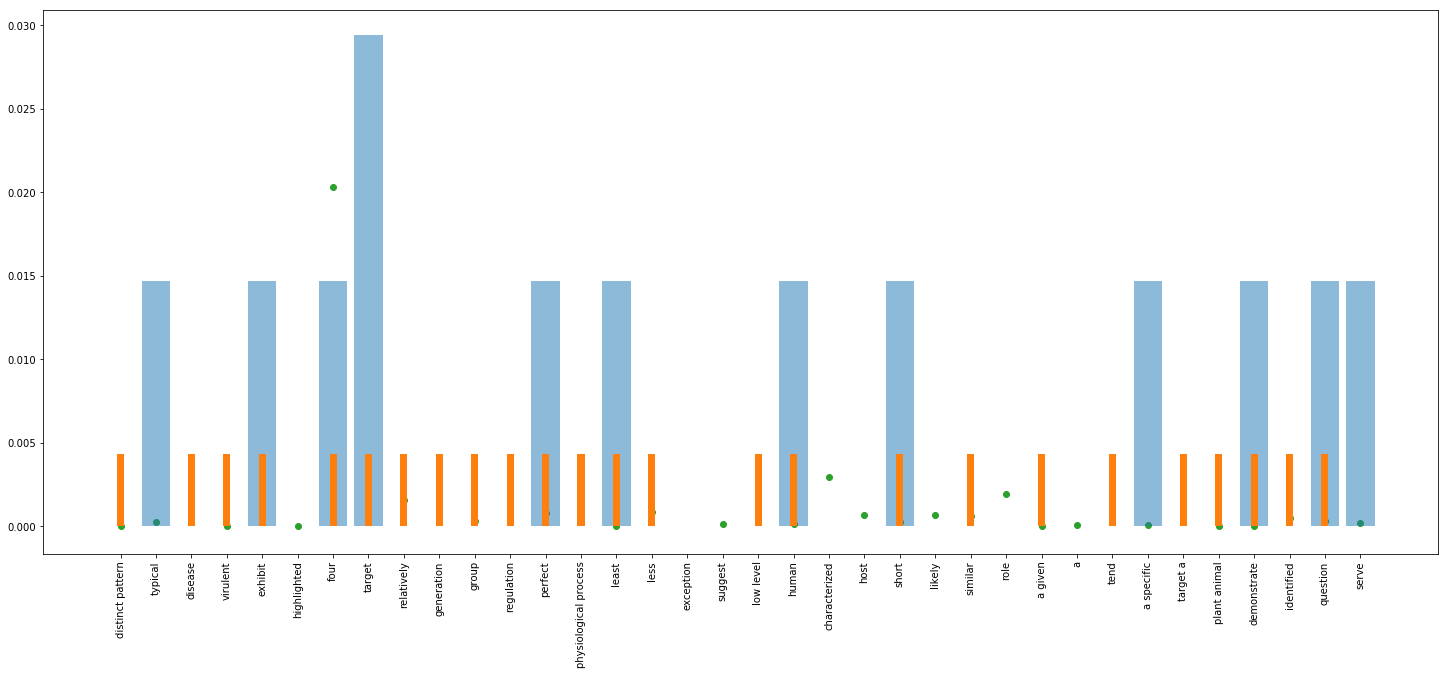

2.39436734283e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=1165959


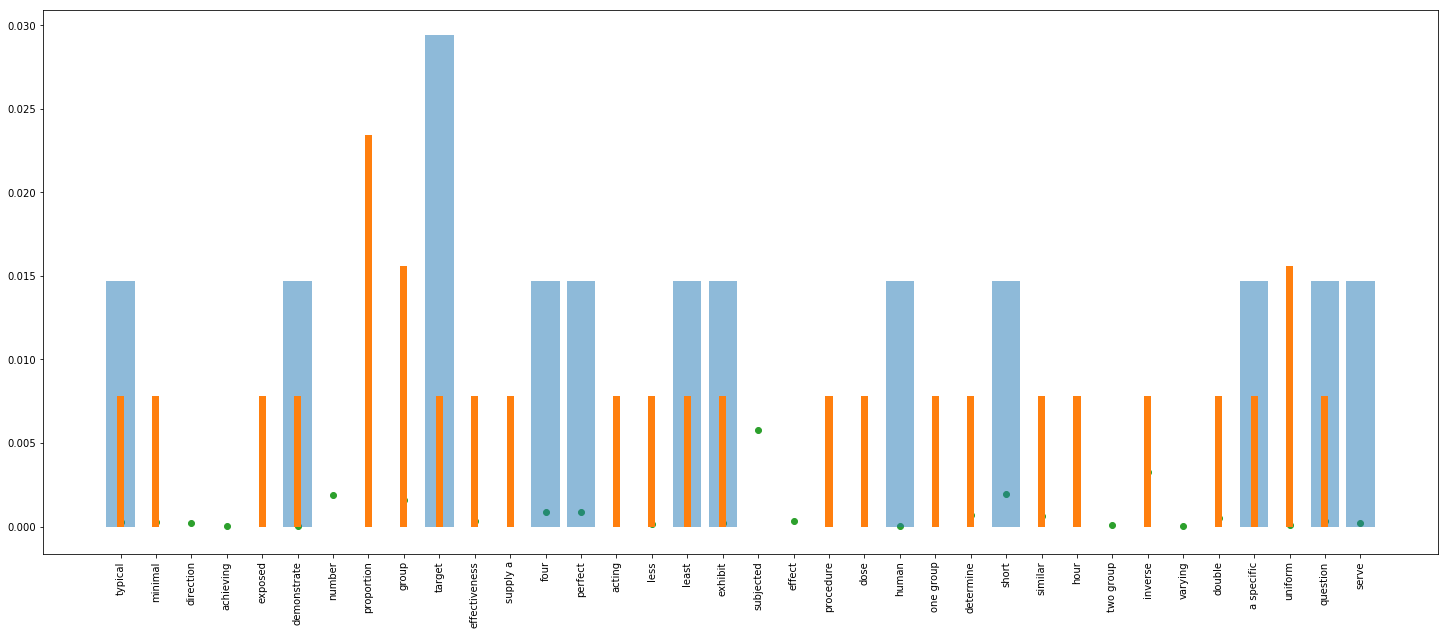

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=11731664


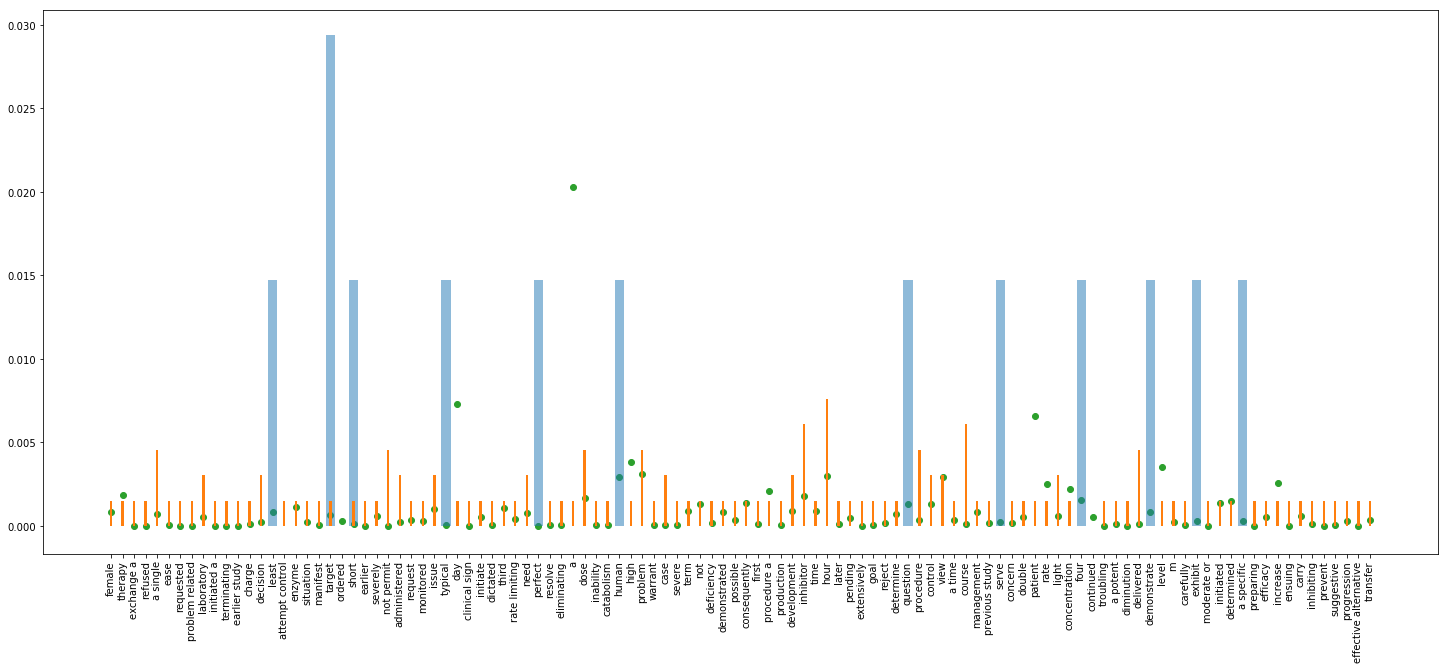

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=19347075


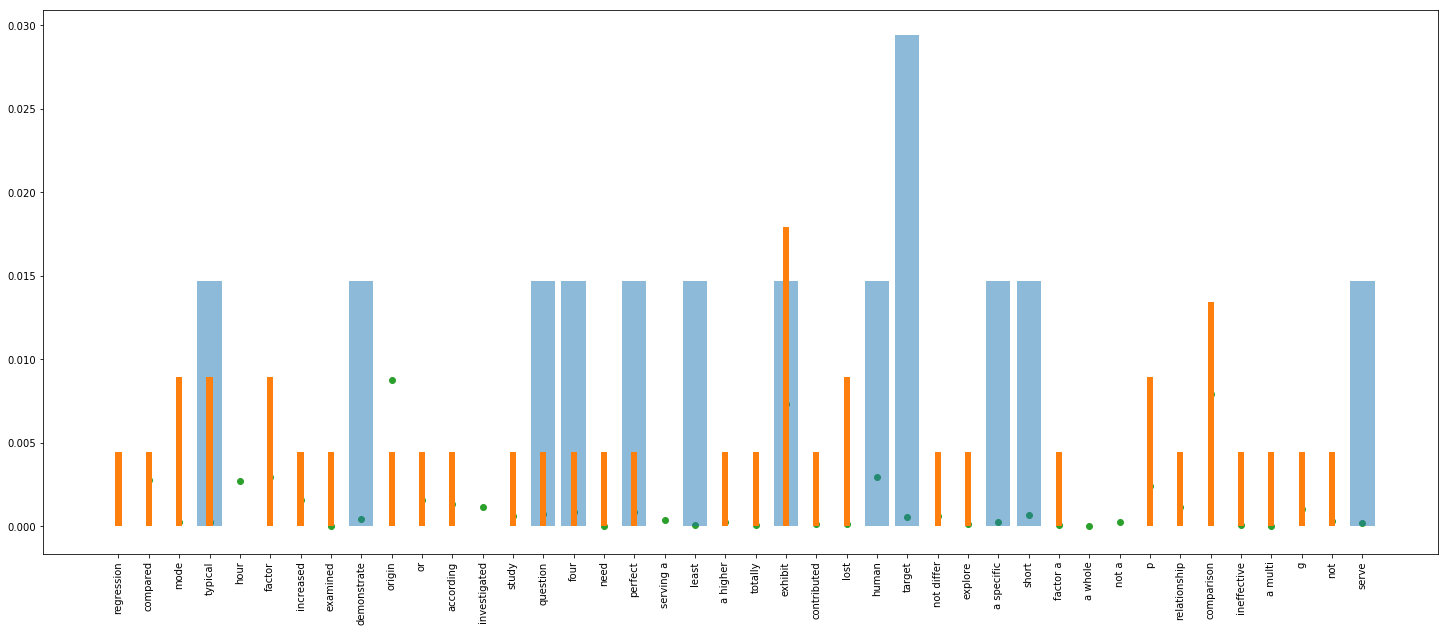

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=11110247


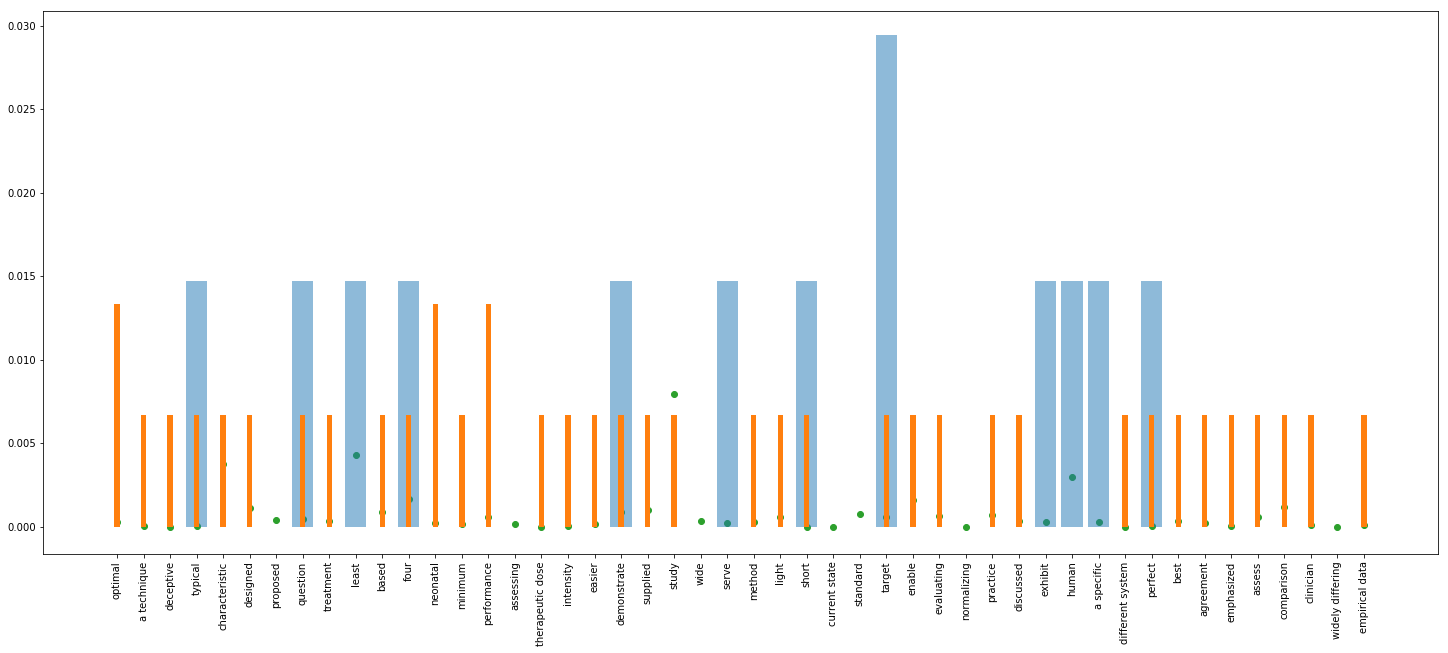

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=27490839


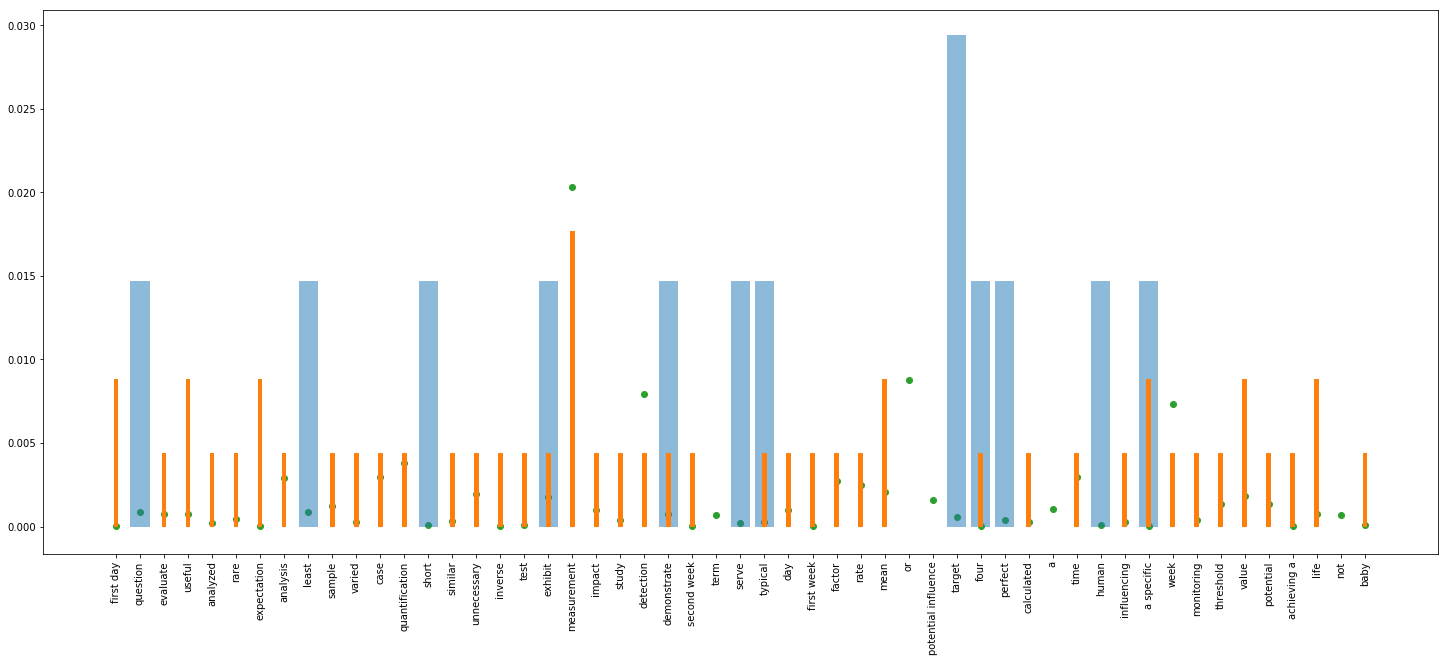

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=26447014


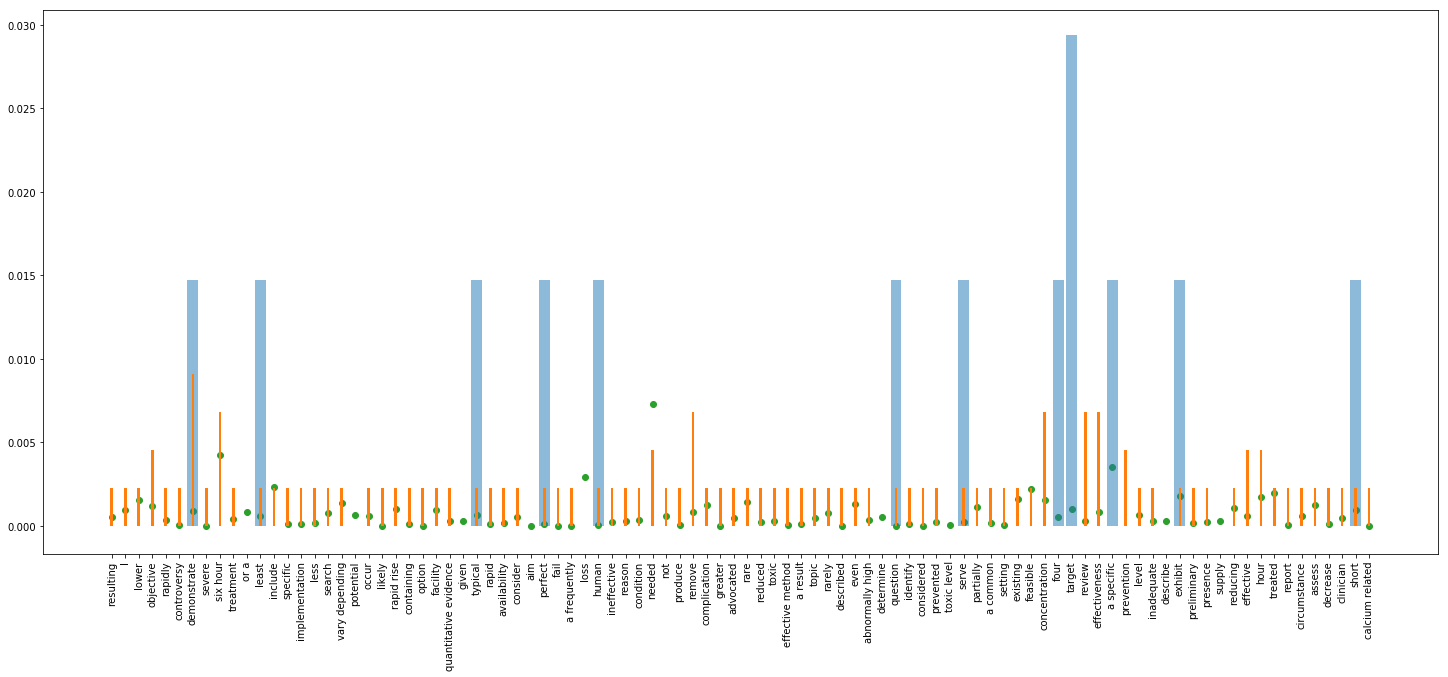

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=11722753


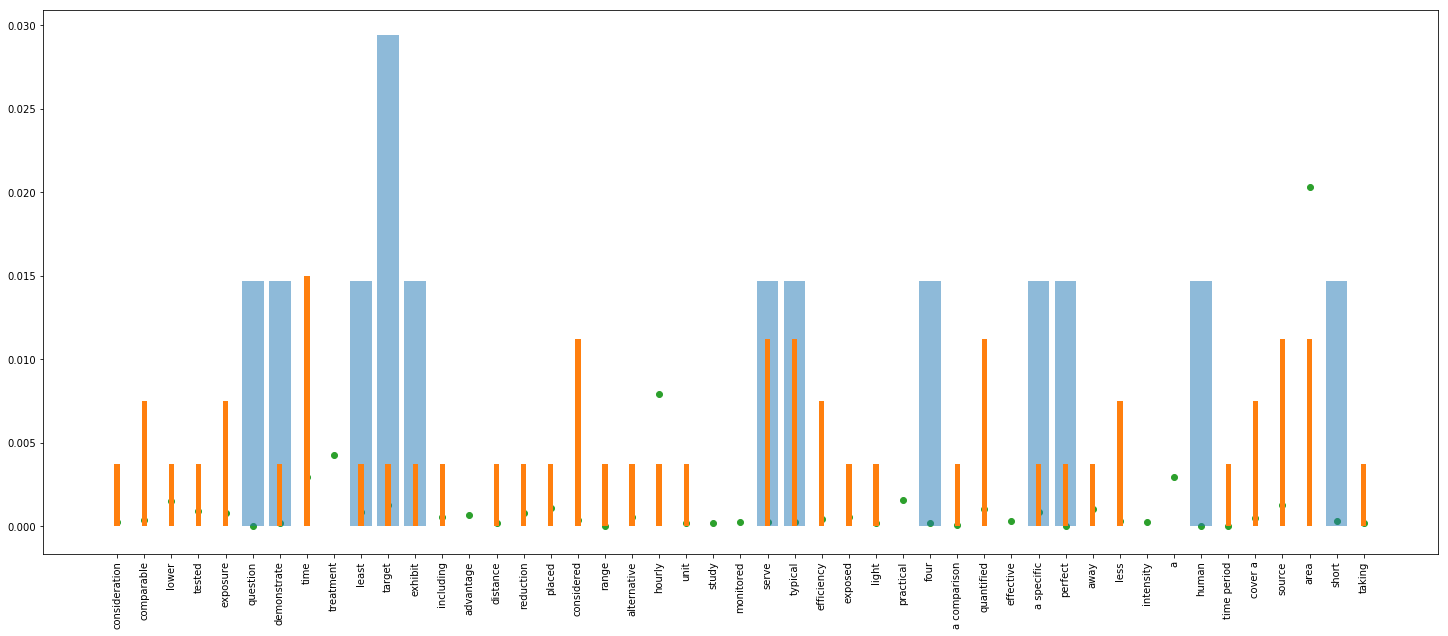

0
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=8545162


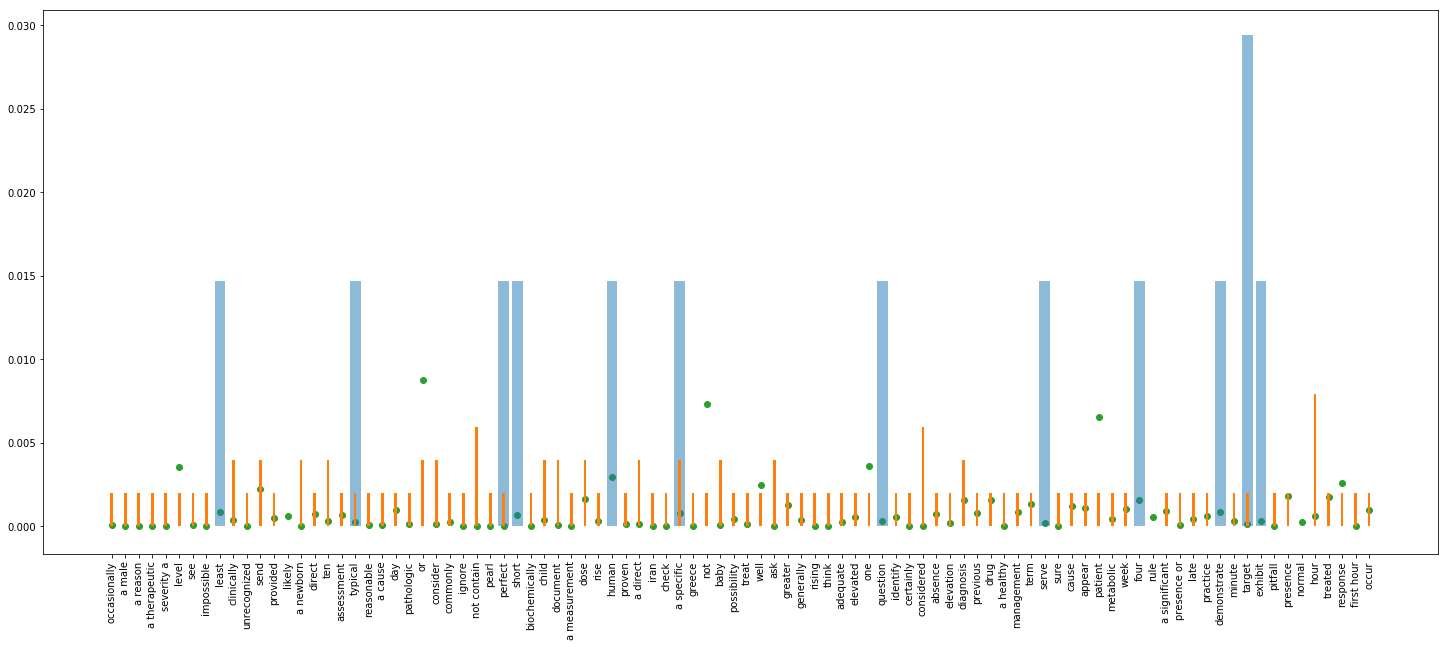

8.06154883308e-07
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=7612090


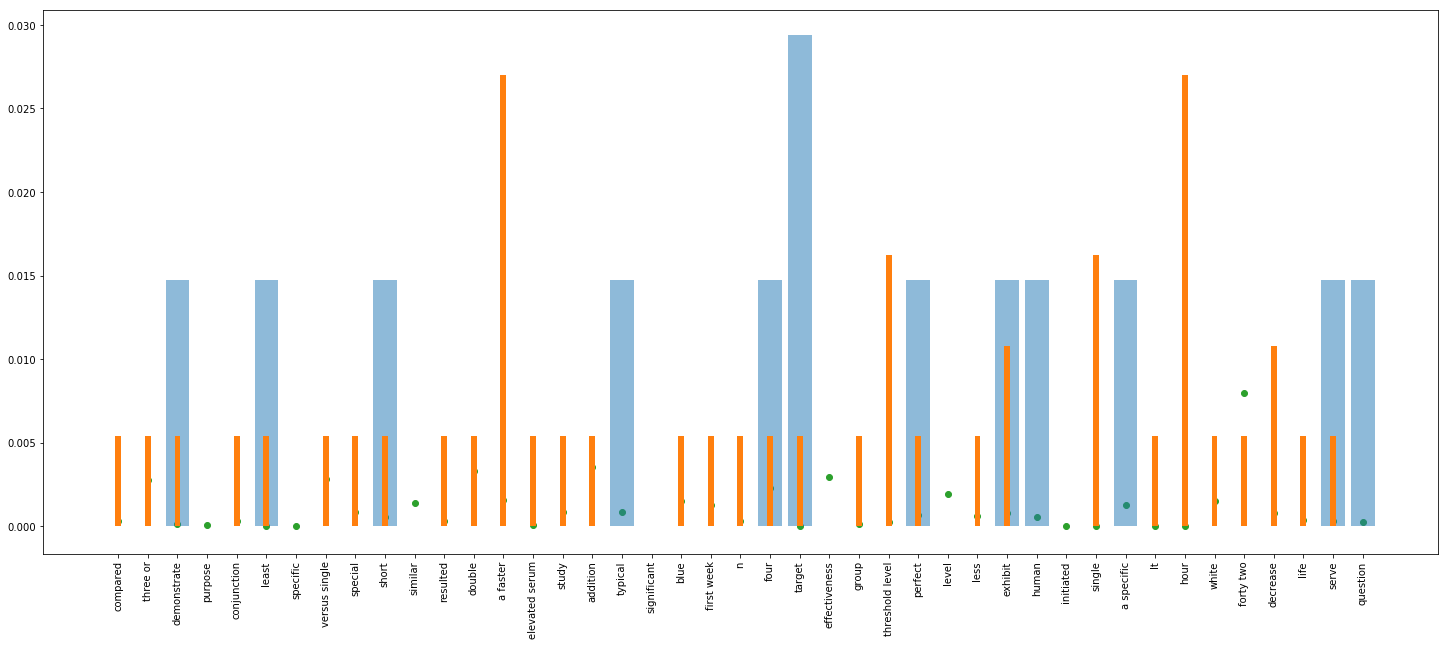

2.59173972086e-06
http://abel.lis.illinois.edu/cgi-bin/cohese/search.py?PMIDs=3993136


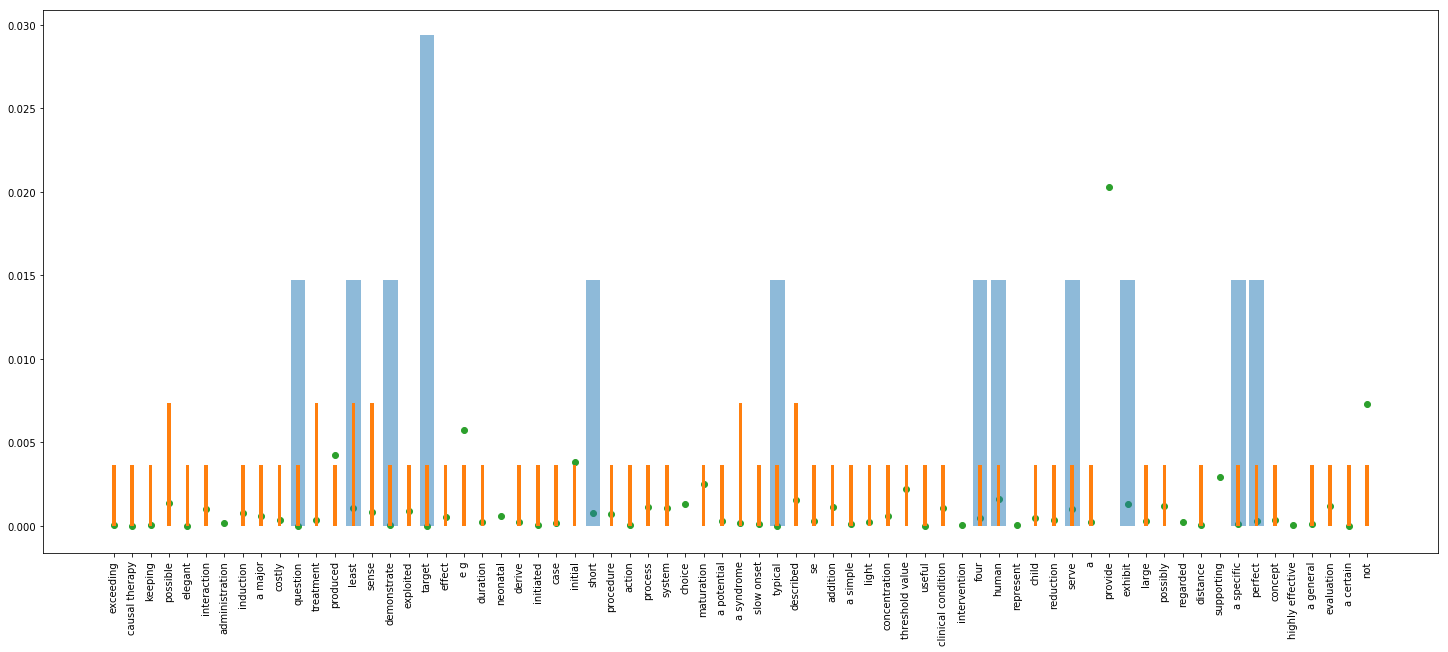

4.34141212714e-06


In [8]:
similarity_list = []
content_sim = [57, 55, 45, 45, 43, 43,43, 43, 42, 42, 41, 40, 40, 8, 7, 6, 6, 6, 4, 3, 2, 2, 1]
content_sim = np.array(content_sim) / (max(content_sim) + 5)
author_sim = np.zeros(len(content_sim))
author_sim[0] = 1
pmid_list = [ 15922829,
24234653 , 
19209240 , 
23142080 , 
22319171 , 
20420713 , 
23024754 , 
21683170 , 
26151747 , 
23087843 , 
20501654 , 
26800695 , 
21645299,
####################
1165959 , 
11731664 , 
19347075 , 
11110247 , 
27490839 , 
26447014 , 
11722753 , 
8545162 , 
7612090 , 
3993136]

for ind, pmid in enumerate( pmid_list ):
    cohesion_dict, word_list, num_words = getListofLowCohessionWords(pmid, coh = 0.1)
    word_freq = dict(Counter( word_list ))
    #print(word_freq)
    word_freq = {k: v / num_words for k, v in word_freq.items()}
    
    parent = word_freq.copy()
    parent.update(word_freq_ref)
    current = word_freq_ref.copy()
    current.update(word_freq)
    ref = current.copy()
    ref={k: Reference_normalized.get(k) for k, v in ref.items()}
    
    #print(num_words)
    sim_score = 0
    for word, _ in word_freq_ref.items():
        if word in word_freq:
            coh_score = 0.1-cohesion_dict[word]
            sim_score = sim_score + (word_freq[word]-Reference_normalized[word])*(word_freq_ref[word]-Reference_normalized[word])*coh_score
            #print(word, " = ", word_freq[word]-Reference_normalized[word], " = ", word_freq_ref[word]-Reference_normalized[word], " = ", coh_score)
        else:
            current[word] = 0
    
    for word, _ in word_freq.items():
        if word not in word_freq_ref:
            parent[word] = 0
    
    #x_par, y_par = zip(*parent)
    #x_cur, y_cur = zip(*current)
    plt.bar(range(len(list(parent.keys()))), list(parent.values()), alpha = 0.5)
    plt.bar(range(len(list(current.keys()))), list(current.values()), width=0.2)
    plt.scatter(range(len(list(ref.keys()))), list(ref.values()))
    plt.xticks(range(len(list(current.keys()))), list(parent.keys()), rotation = 90)
    plt.show()
    print(sim_score)
    similarity_list.append(sim_score)
    
similarity_list = np.array(similarity_list) / (max(similarity_list))     

In [161]:
author_sim = np.zeros(len(content_sim))
author_sim[0] = 1
author_sim

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [9]:
pd.DataFrame(data={"Similarity Score":similarity_list, "Content Score": content_sim, "Same Author": author_sim}, index=pmid_list)
#print(similarity_list)
#print(content_sim)

,Content Score,Same Author,Similarity Score
15922829,0.919355,1.0,0.486022
24234653,0.887097,0.0,0.187534
19209240,0.725806,0.0,0.335980
23142080,0.725806,0.0,1.000000
22319171,0.693548,0.0,0.180490
20420713,0.693548,0.0,0.196918
23024754,0.693548,0.0,0.589562
21683170,0.693548,0.0,0.000000
26151747,0.677419,0.0,0.340163
23087843,0.677419,0.0,0.692333


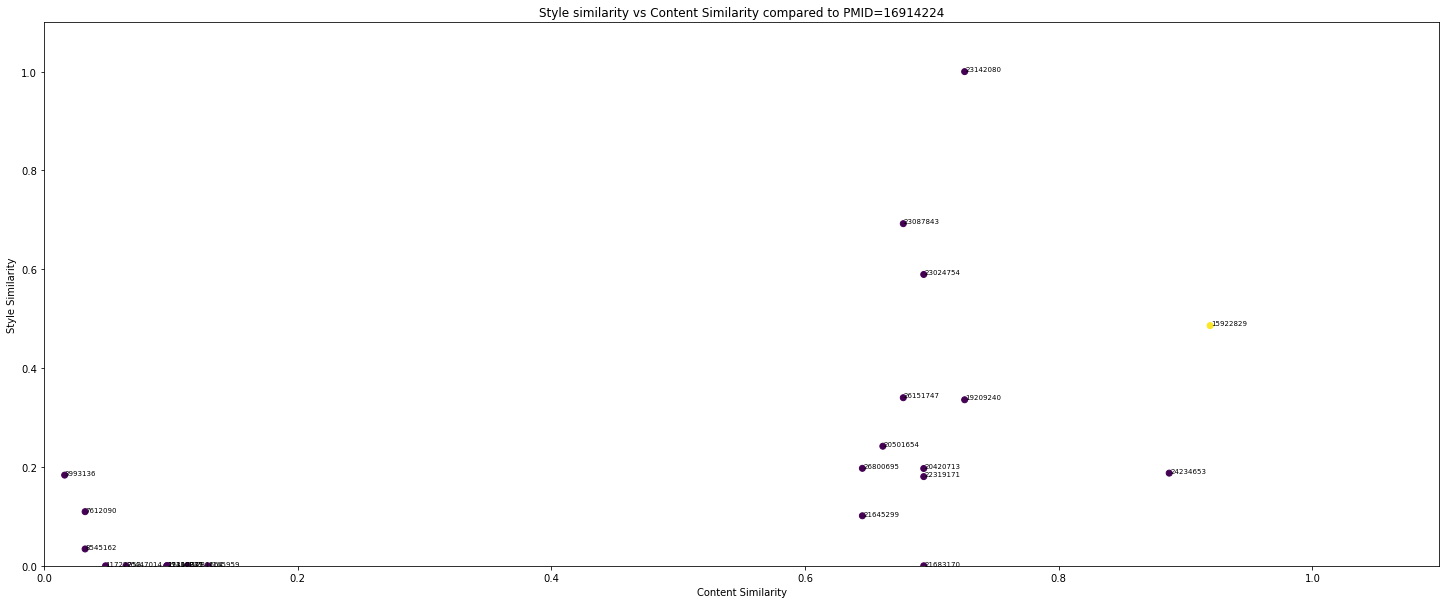

In [10]:
import random
fig, ax = plt.subplots()
a = ax.scatter(x=content_sim, y=similarity_list, c=author_sim, label=author_sim)
count = 0
for p,i,j in zip(pmid_list, content_sim,similarity_list):
    if (count%2)==0:
        xt=i+5
        yt=j+5
    else:
        xt=i-5
        yt=j-5
    count=count+1
    ax.annotate('%s' %p, xy=(i,j), xytext=(i,j), textcoords='offset points', size = 7)
                #arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

plt.ylim((0, 1.1))
plt.xlim((0, 1.1))
plt.xlabel("Content Similarity")
plt.ylabel("Style Similarity")
plt.title("Style similarity vs Content Similarity compared to PMID=16914224")
#plt.legend(['same author', 'difference author'],
#           scatterpoints=1,
#           loc='upper left',
#           fontsize=10)
plt.show()

